# Classification-Project (Predicting Customer Churn)

## **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, pickle
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn import compose
from sklearn import preprocessing 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer

## **Loading/Reading the dataset**

In [2]:
original_df= pd.read_csv('Data/Telco-Customer-Churn.csv')

In [3]:
# Defining df for analysis
df = original_df
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

## **Exploring the dataset**

In [4]:
# Checking the shape of the data(number of rows and columns)
df.shape

(7043, 21)

In [5]:
# checking the number of unique values in each column of the data
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
# Checking the completness of the data, and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Cleaning of Data**

In [7]:
# Replace all missing string values with 0
df.TotalCharges = df.TotalCharges.replace(" ", 0)

# Change totalcharges type from string to float
df.TotalCharges = df.TotalCharges.astype('float32')

## **Data Types**

The data consist of 7043 rows and 21 columns. Each row represents the data of a unique customer. We have one target column (Churn) and the remaining 20 columns have 19 columns with relevant features and one column containing customer ID
#### **Target:**
- Churn (binary)
    
#### **Categorical Features:**
- Gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod

#### **Nominal Features:**
- Tenure
- MonthlyCharges
- TotalCharges


## **Data Evaluation**

 ### **1 General EDA**

In [8]:
def data_distribution_plot(df):
    sns.set_context('notebook', font_scale = 2)
    sns.set(style = 'darkgrid')
    fig = plt.figure(figsize = (15, 5))
    plt.subplot(121)
    plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={
        'fontsize': 22, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 32, fontweight = 'bold')
    plt.subplot(122)
    graph = sns.countplot(df.Churn)
    graph.set_xlabel('Churn', fontweight = 'bold', fontsize = 22)
    graph.set_ylabel('Count', fontweight = 'bold', fontsize = 22)
    plt.title('Churn Outcome Distribution', fontsize = 32, fontweight = 'bold')
    plt.tight_layout()

### 1.1 What is the percentage of Churned Customers?

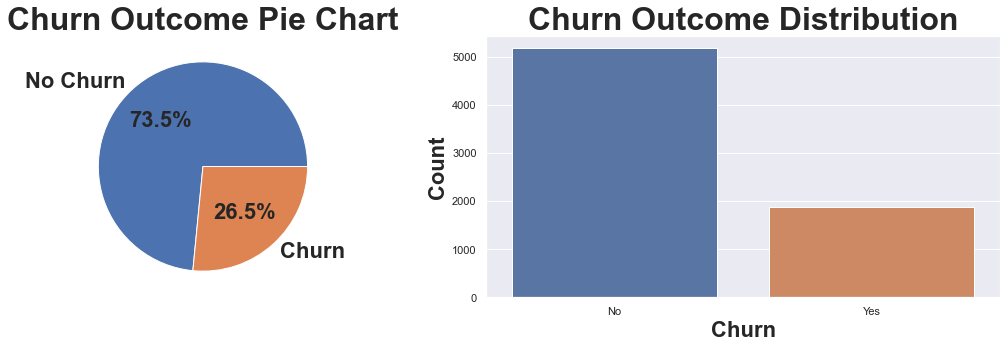

In [9]:
data_distribution_plot(df)

### **2 Categorical Features EDA**

In this section, we will visualise each categorical variable in the data separately by visualising the:
- Percentage Composition of the unique values in each variable
- Distribution of the unique values in each variable by churn
- Violin plot for monthly charges by 'variable'

In [10]:
# Functions for Categorical Features EDA

def gender_dist_plots(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (32,10))
    
    plt.subplot(131)
    plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%',
            radius = 1, textprops = {'fontsize':22, 'fontweight':'bold'})
    plt.title('Customer Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = df, x = 'gender', hue = 'Churn')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 22)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 22)
    
    plt.subplot(133)
    x = sns.violinplot('gender', 'MonthlyCharges', 'Churn', df, split = True)
    x.set_title('Violin Plot for Monthly Charges by Gender', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('Gender', fontsize = 22, fontweight = 'bold')
    x.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 22)
    
    plt.tight_layout()
    

def plot_citizen_class_dist(df):
    
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.SeniorCitizen.value_counts(), labels = ['Non-Senior Citizen', 'Senior Citizen'],
            autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Composition of Citizen class', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    g = df.copy()
    g = g.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'total'}, axis = 1).reset_index()
    g['total'] = (g['total']/len(df)) * 100
    t = sns.barplot('SeniorCitizen', y = 'total', hue = 'Churn', data = g)
    t.set_title('Churn Percentage by Citizen class', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('Percentage of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 22)
    
    plt.subplot(133)
    x = sns.violinplot('SeniorCitizen', 'MonthlyCharges', 'Churn', df, split = True)
    x.set_title('Violin Plot for Monthly Charges by Citizen class', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('')
    x.set_ylabel('Monthly Charges', fontsize = 20, fontweight = 'bold')
    x.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontsize = 22, fontweight = 'bold')
    
    plt.tight_layout()
    
    
def partner_plots(df):
    
    fig = plt.figure(figsize = (30,10))
    x = df.copy()
    plt.subplot(131)
    plt.pie(df.Partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = 90)
    plt.title('Partner Composition of Customers', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    x = df.copy()
    x = x.groupby('Partner')['Churn'].value_counts().to_frame()
    x = x.rename({'Churn':'total'}, axis = 1).reset_index()
    x['total'] = (x['total']/len(df)) * 100
    u = sns.barplot('Partner', y = 'total', hue = 'Churn', data = x)
    u.set_title('Churn Percentage by Partner', fontweight = 'bold', fontsize = 30)
    u.set_xticklabels(labels = ['No Partner', 'Partner'], fontweight = 'bold', fontsize = 22)
    u.set_xlabel('')
    u.set_ylabel('Percentage of Total', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    y = sns.violinplot('Partner', 'MonthlyCharges', 'Churn', df, split = True)
    y.set_title('Violin Plot for Monthly Charges by Partner', fontweight = 'bold', fontsize = 30)
    y.set_xticklabels(labels = ['Partner', 'No Partner'], fontweight = 'bold', fontsize = 22)
    y.set_xlabel('')
    
    
def dependents_plot(df):
    fig = plt.figure(figsize = (30,10))
    x = df.copy()
    plt.subplot(131)
    plt.pie(df.Dependents.value_counts(), labels = ['No Dependents', 'Dependents'], 
            autopct = '%.1f%%', radius = 1,  textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Dependent Composition of Customers', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(132)
    y = df.copy()
    y = y.groupby('Dependents')['Churn'].value_counts().to_frame()
    y = y.rename({'Churn':'total'}, axis = 1).reset_index()
    y['total'] = (y['total']/len(df)) * 100
    v = sns.barplot('Dependents', y = 'total', hue = 'Churn', data = y)
    v.set_title('Churn percentage by Dependents', fontweight = 'bold', fontsize = 30)
    v.set_xticklabels(labels = ['No Dependents', 'Dependents'], fontweight = 'bold', fontsize = 22)
    v.set_xlabel('')
    v.set_ylabel('')
    
    plt.subplot(133)
    z = sns.violinplot('Dependents', 'MonthlyCharges', 'Churn', df, split = True)
    z.set_title('Violin Plot for Monthly Charges by Dependents', fontweight = 'bold', fontsize = 30)
    z.set_xticklabels(labels = ['No Dependents', 'Dependents'], fontweight = 'bold', fontsize = 22)
    z.set_xlabel('')
    z.set_ylabel('Monthly Charges', fontweight = 'bold', fontsize = 20)
    
    
def phone_services_plots(df):
    
    fig = plt.figure(figsize = (36, 20))

    plt.subplot(231)
    plt.pie(df.PhoneService.value_counts(), labels = ['Phone Service', 'No Phone Services'],
            autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Phone Service Composition of Customers', fontsize = 28, fontweight = 'bold')
    
    plt.subplot(232)
    x = df.copy()
    x = x.groupby('PhoneService')['Churn'].value_counts().to_frame()
    x = x.rename({'Churn':'total'}, axis = 1).reset_index()
    x['total'] = (x['total']/len(df)) * 100
    a = sns.barplot('PhoneService', y = 'total', hue = 'Churn', data = x)
    a.set_title('Percentage Churn by Phone Service', fontsize = 28, fontweight = 'bold')
    a.set_xticklabels(labels = ['No Phone', 'Phone'], fontweight = 'bold', fontsize = 22)
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    
    plt.subplot(233)
    az = sns.violinplot('PhoneService', 'MonthlyCharges', 'Churn', df, split = True)
    az.set_title('Violin Plot for Monthly Charges by Phone Service', fontsize = 28, fontweight = 'bold')
    az.set_xlabel('')
    az.set_ylabel('Monthly Charges', fontsize = 20, fontweight = 'bold')
    az.set_xticklabels(labels = ['No Phone', 'Phone'], fontweight = 'bold', fontsize = 22)
    
    plt.subplot(234)
    plt.pie(df.MultipleLines.value_counts(), labels = ['Single Line', 'Multiple Lines', 'No Phone Service'],
            autopct = '%.1f%%', radius = 1, textprops = {'fontweight':'bold', 'fontsize': 20}, startangle = 180)
    plt.title('Customer Churn - Quantity of Lines', fontsize = 28, fontweight = 'bold')

    
    plt.subplot(235)
    xx = df.copy()
    xx = xx.groupby('MultipleLines')['Churn'].value_counts().to_frame()
    xx = xx.rename({'Churn':'total'}, axis = 1).reset_index()
    xx['total'] = (xx['total']/len(df)) * 100
    ab = sns.barplot('MultipleLines', y = 'total', hue = 'Churn', data = xx)
    ab.set_xticklabels(labels = ['Single Line', 'No Phone Service', 'Multiple Lines'], fontweight = 'bold', fontsize = 22)
    ab.set_title('')
    ab.set_xlabel('')
    ab.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    ab.set_title('Percentage Churn by Phone Line Quantity.', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(236)
    s = sns.violinplot('MultipleLines', 'MonthlyCharges', 'Churn', df, split = True)
    s.set_title('Violin Plot for Monthly Charges by Line Quantity', fontweight = 'bold', fontsize = 28)
    s.set_xlabel('')
    s.set_ylabel('Monthly Charges', fontweight = 'bold')
    s.set_xticklabels(labels = ['No Phone Service', 'Single Line', 'Multiple Lines'], fontweight = 'bold', fontsize = 22)

    

def internet_services_plot(df):
    
    copy = df.copy()
    fig = plt.figure(figsize = (30, 10))

    plt.subplot(131)
    plt.pie(copy.InternetService.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
    plt.title('Internet Service Composition of Customers', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    copy = copy.groupby('InternetService')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'total'}, axis = 1).reset_index()
    copy['total'] = (copy['total']/len(df)) * 100
    d = sns.barplot('InternetService', y = 'total', hue = 'Churn', data = copy)
    d.set_title('Percentage Churn by Internet Service', fontweight= 'bold', fontsize = 30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    d.set_xticklabels(labels = ['DSL', 'Fiber Optic', 'No Internet Service'], fontweight = 'bold', fontsize = 22)
    
    plt.subplot(133)
    e = sns.violinplot('InternetService', 'MonthlyCharges', 'Churn', df, split = True)
    e.set_title('Violin Plot for Monthly Charges by Internet Service', fontweight= 'bold', fontsize = 30)
    e.set_xlabel('')
    #e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    e.set_xticklabels(labels = ['DSL', 'Fiber Optic', 'No Internet Service'], fontweight = 'bold', fontsize = 22)
    e.set_ylabel('Monthly Charges', fontweight = 'bold', fontsize = 30)

    fig.tight_layout()
    
    
def contracts_plot(df):
    
    copy = df.copy()
    plt.figure(figsize = (35, 10))
    
    plt.subplot(131)
    plt.pie(copy.Contract.value_counts(), labels = ['Monthly', '1 Year', '2 Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('Contract')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'total'}, axis = 1).reset_index()
    copy['total'] = (copy['total']/len(df)) * 100
    a = sns.barplot('Contract', y = 'total', hue = 'Churn', data = copy)
    a.set_title('Percentage Churn - Contract Type', fontsize = 30, fontweight = 'bold')
    a.set_xticklabels(labels = ['Monthly', '1 Year', '2 Year'], fontweight = 'bold', fontsize = 22)
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('Contract', 'MonthlyCharges', 'Churn', df, split = True)
    b.set_title('Violin Plot for Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set_xticklabels(labels = ['Monthly', '1-Year', '2-Year'], fontweight = 'bold', fontsize = 22)
    b.legend(loc = 'upper left')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
    
def paperless_plot(df):
    
    copy = df.copy()
    plt.figure(figsize = (35, 10))
    
    plt.subplot(131)
    plt.pie(copy.PaperlessBilling.value_counts(), labels = ['Paperless', 'Not Paperless'], 
            autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn Percentage by Billing Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'total'}, axis = 1).reset_index()
    copy['total'] = (copy['total']/len(df)) * 100
    a = sns.barplot('PaperlessBilling', y = 'total', hue = 'Churn', data = copy)
    a.set_title('Percentage Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
    a.set_xticklabels(labels = ['Paperless', 'Not Paperless'], fontweight = 'bold', fontsize = 22)
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('PaperlessBilling', 'MonthlyCharges', 'Churn', df, split = True)
    b.set_title('Violin Plot for Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges', fontweight = 'bold', fontsize = 20)
    b.set_xticklabels (labels = ['Paperless', 'Not Paperless'], fontweight = 'bold', fontsize = 22)
    b.legend(loc = 'upper right')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
    plt.tight_layout()
    
    
def payment_methods_plot(df):
    
    copy = df.copy()
    plt.figure(figsize = (35, 10))
    
    plt.subplot(131)
    plt.pie(copy.PaymentMethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
    plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(132)
    copy = copy.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'total'}, axis = 1).reset_index()
    copy['total'] = (copy['total']/len(df))*100
    a = sns.barplot('PaymentMethod', 'total', 'Churn', data = copy)
    a.set_title('Percentage Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation = 45, fontweight = 'bold', fontsize = 22)
    
    plt.subplot(133)
    c = sns.violinplot('PaymentMethod', 'MonthlyCharges', 'Churn', df, split = True)
    c.set_title('Violin Plot for Monthly Charge - Payment Methods', fontsize = 30, fontweight = 'bold')
    c.set_xlabel('')
    c.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 30)
    c.set_xticklabels(a.get_xticklabels(), rotation = 45, fontweight = 'bold', fontsize = 22)
    
    plt.tight_layout()
    
    
def add_services_plot(df):
    copy = df[df.InternetService != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.OnlineSecurity.value_counts(), labels = ['Yes', 'No'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers on Online Security', fontweight = 'bold', fontsize = 28)
    
    plt.subplot(262)
    plt.pie(copy.OnlineBackup.value_counts(), labels = ['Yes', 'No'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers on Online Backup', fontweight = 'bold', fontsize = 28)
    
    plt.subplot(263)
    plt.pie(copy.DeviceProtection.value_counts(), labels = ['Yes', 'No'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers on Device Protection', fontweight = 'bold', fontsize = 28)
    
    plt.subplot(264)
    plt.pie(copy.TechSupport.value_counts(), labels = ['Yes', 'No'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers on Tech Support', fontweight = 'bold', fontsize = 28)
    
    plt.subplot(265)
    plt.pie(copy.StreamingTV.value_counts(), labels = ['Yes', 'No'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers on Streaming TV', fontweight = 'bold', fontsize = 28)
    
    plt.subplot(266)
    plt.pie(copy.StreamingMovies.value_counts(), labels = ['Yes', 'No'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers on Movie Streaming', fontweight = 'bold', fontsize = 28)
    
    plt.subplot(267)
    copy1 = copy[copy.OnlineSecurity == 'Yes']
    plt.pie(copy1.Churn.value_counts(), labels = ['No Churn', 'Churn'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 28, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.OnlineBackup == 'Yes']
    plt.pie(copy2.Churn.value_counts(), labels = ['No Churn', 'Churn'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 28, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.DeviceProtection == 'Yes']
    plt.pie(copy3.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 28, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.TechSupport == 'Yes']
    plt.pie(copy4.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 28, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.StreamingTV == 'Yes']
    plt.pie(copy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 28, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.StreamingMovies == 'Yes']
    plt.pie(copy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], 
            autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 28, fontweight = 'bold')
    
    plt.tight_layout()
    

def service_charges_plot(df):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (40, 10), sharex = True, sharey = True)
    
    copy1 = df[df.OnlineSecurity != 'No internet service']
    a = sns.violinplot('OnlineSecurity', 'MonthlyCharges', 'Churn', copy1, split = True, ax = axes[0])
    a.set_title('Online Security', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('On Service', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    a.set_yticklabels(a.get_yticks(), size = 25, weight = 'bold')
    a.legend(loc = 'upper left', )
    a.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})

    copy2 = df[df.OnlineBackup != 'No internet service']
    b = sns.violinplot('OnlineBackup', 'MonthlyCharges', 'Churn', copy2, split = True, ax = axes[1])
    b.set_title('Online Backup', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('On Service', fontweight = 'bold', fontsize = 20)
    b.set_ylabel('')
    b.legend_.remove()
    
    copy3 = df[df.DeviceProtection != 'No internet service']
    c = sns.violinplot('OnlineBackup', 'MonthlyCharges', 'Churn', copy3, split = True, ax = axes[2])
    c.set_title('Device Protection', fontweight = 'bold', fontsize = 30)
    c.set_xlabel('On Service', fontweight = 'bold', fontsize = 20)
    c.set_ylabel('')
    c.legend_.remove()
    
    copy4 = df[df.TechSupport != 'No internet service']
    d = sns.violinplot('TechSupport', 'MonthlyCharges', 'Churn', copy3, split = True, ax = axes[3])
    d.set_title('Tech Support', fontsize = 30, fontweight = 'bold')
    d.set_xlabel('On Service', fontsize = 20, fontweight = 'bold')
    d.set_ylabel('')
    d.legend_.remove()
    
    copy5 = df[df.StreamingTV != 'No internet service']
    e = sns.violinplot('StreamingTV', 'MonthlyCharges', 'Churn', copy4, split = True, ax = axes[4])
    e.set_title('Streaming TV', fontsize = 30, fontweight = 'bold')
    e.set_xlabel('On Service', fontweight = 'bold', fontsize = 20)
    e.set_ylabel('')
    e.legend_.remove()
    
    copy5 = df[df.StreamingMovies != 'No internet service']
    f = sns.violinplot('StreamingMovies', 'MonthlyCharges', 'Churn', copy5, split = True, ax = axes[5])
    f.set_title('Streaming Movies', fontweight = 'bold', fontsize = 30)
    f.set_xlabel('On Service', fontsize = 20, fontweight = 'bold')
    f.set_ylabel('')
    f.legend(loc = 'upper left')
    f.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})
    

### 2.1 Gender

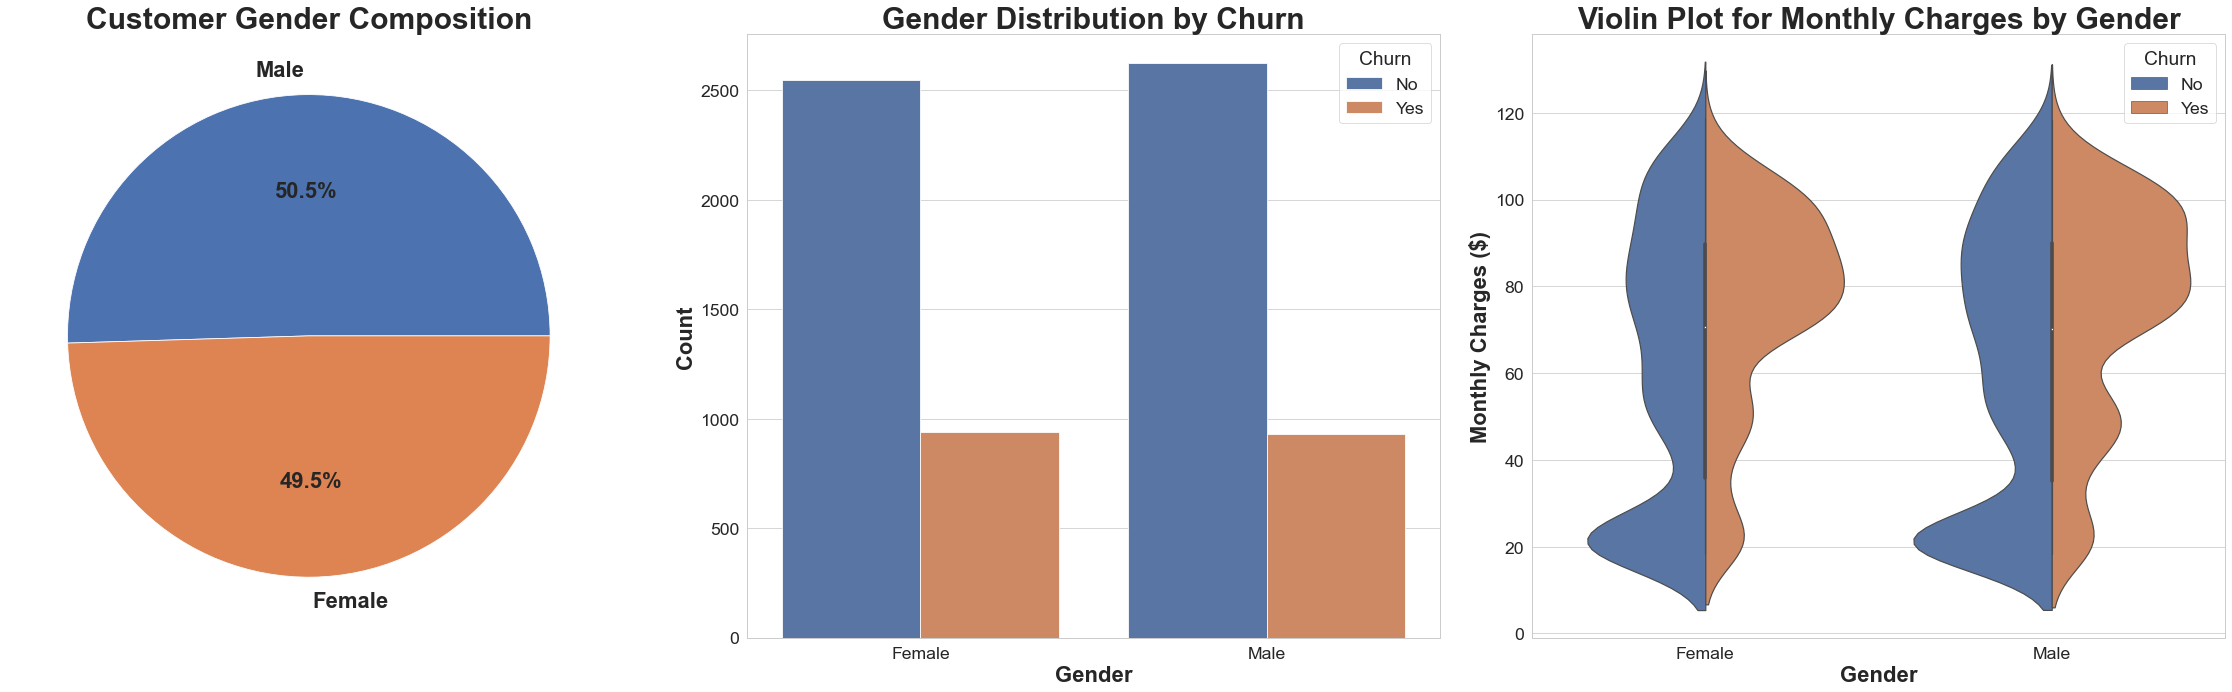

In [11]:
gender_dist_plots(df)

**Comments:** 

Gender does not appear to be an indicator of Churn. The composition of males and females is approximately distributed evenly and does not show any effect on Churn customers.

### 2.2 Citizen Class

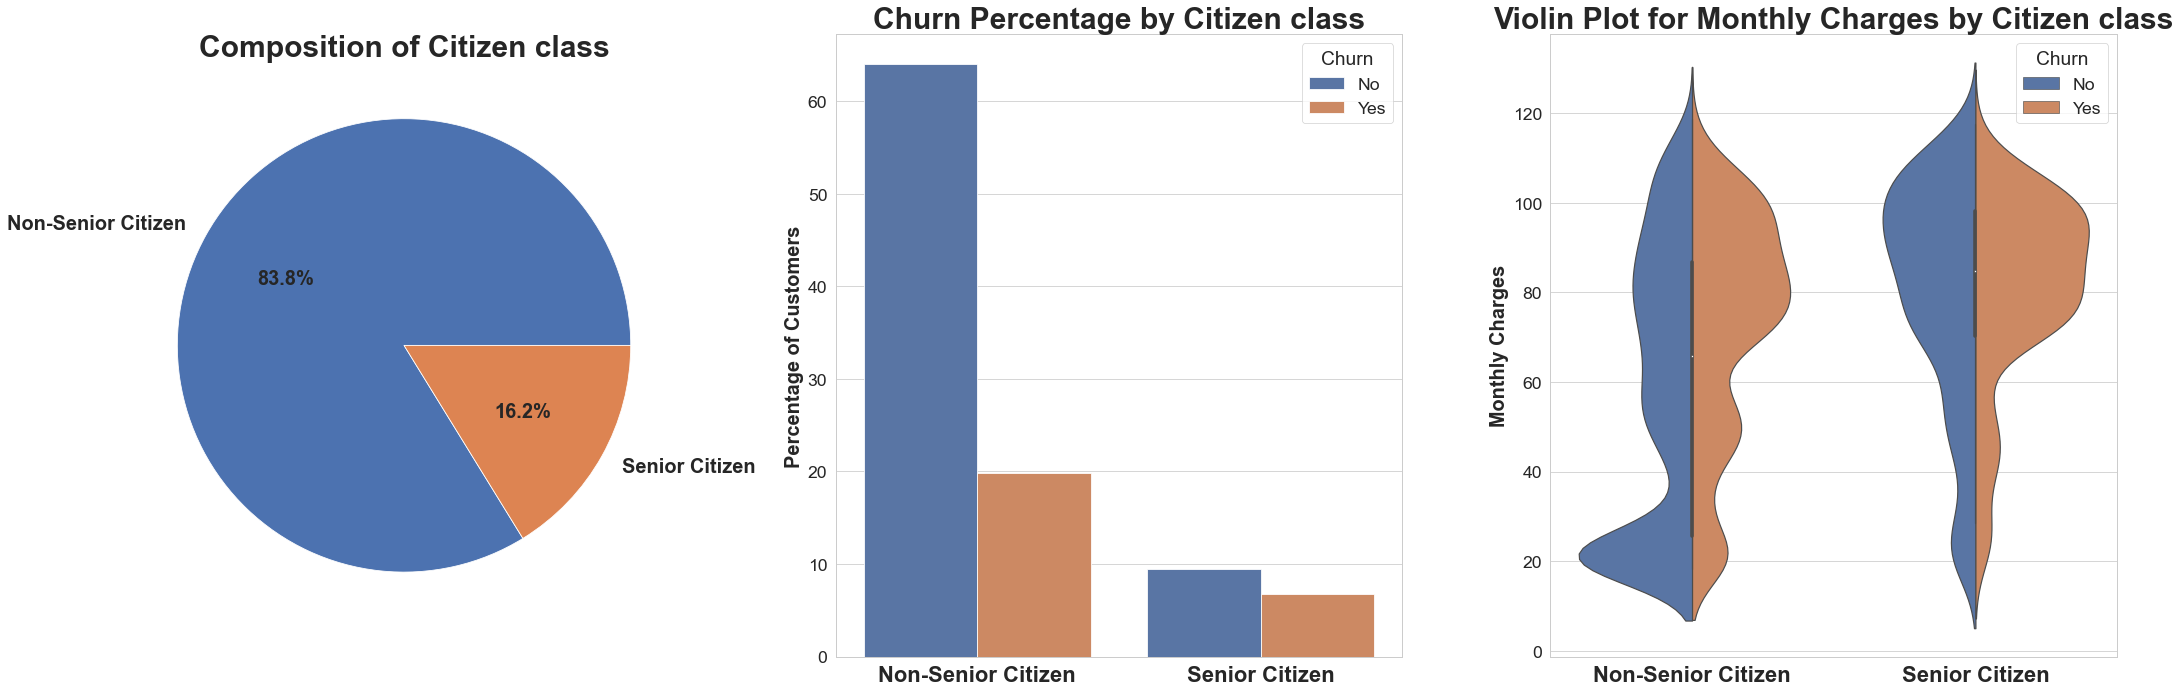

In [12]:
plot_citizen_class_dist(df)

**Comments:**
- The composition of senior citizens(16.2%) are significantly lesser than non-senior citizens(83.8%)
- Overall, more non-senior citizens churn than senior citizens, but a higher proportion of senior citizens churn than non-senior citizens

### 2.3 Partner

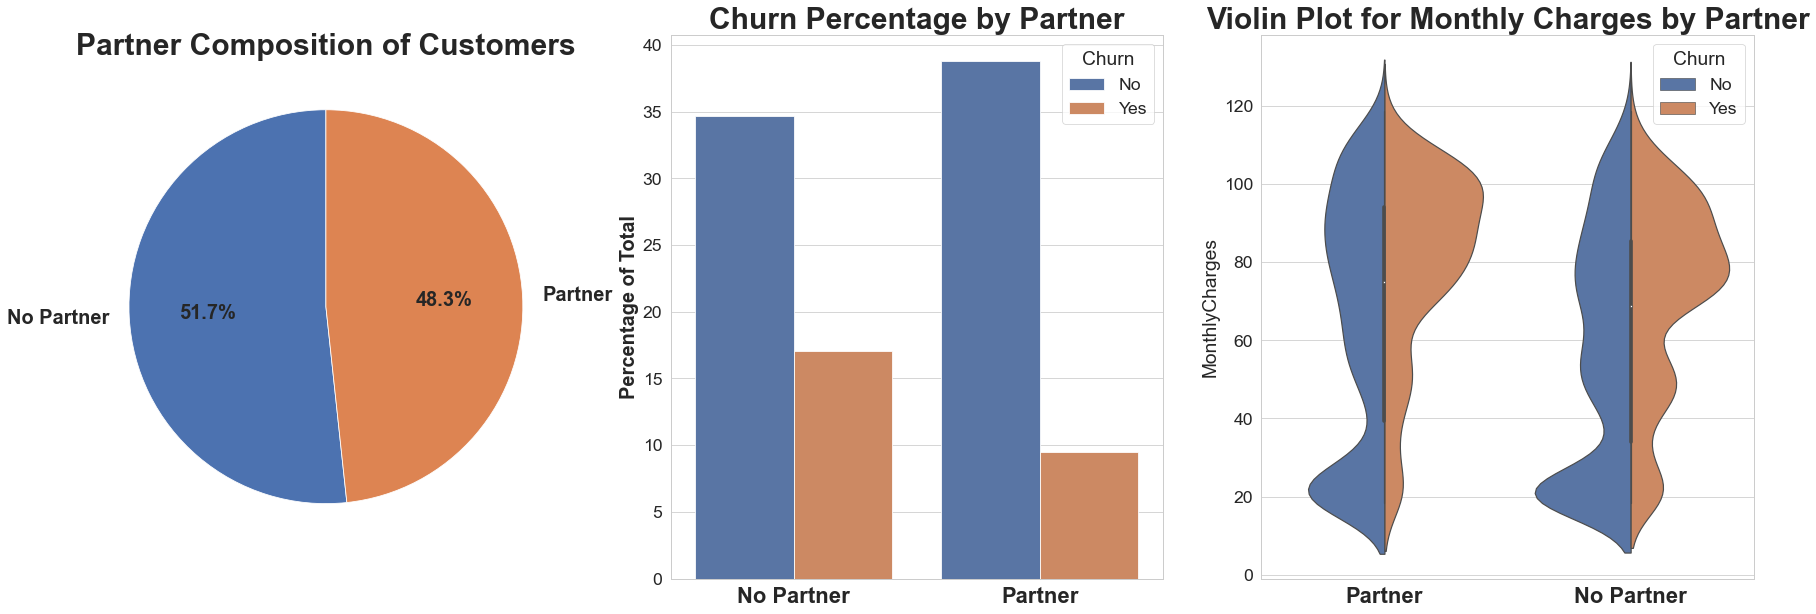

In [13]:
partner_plots(df)

**Comments:**
- Customers without partners are more likely to churn than those with partners

### 2.4 Dependents

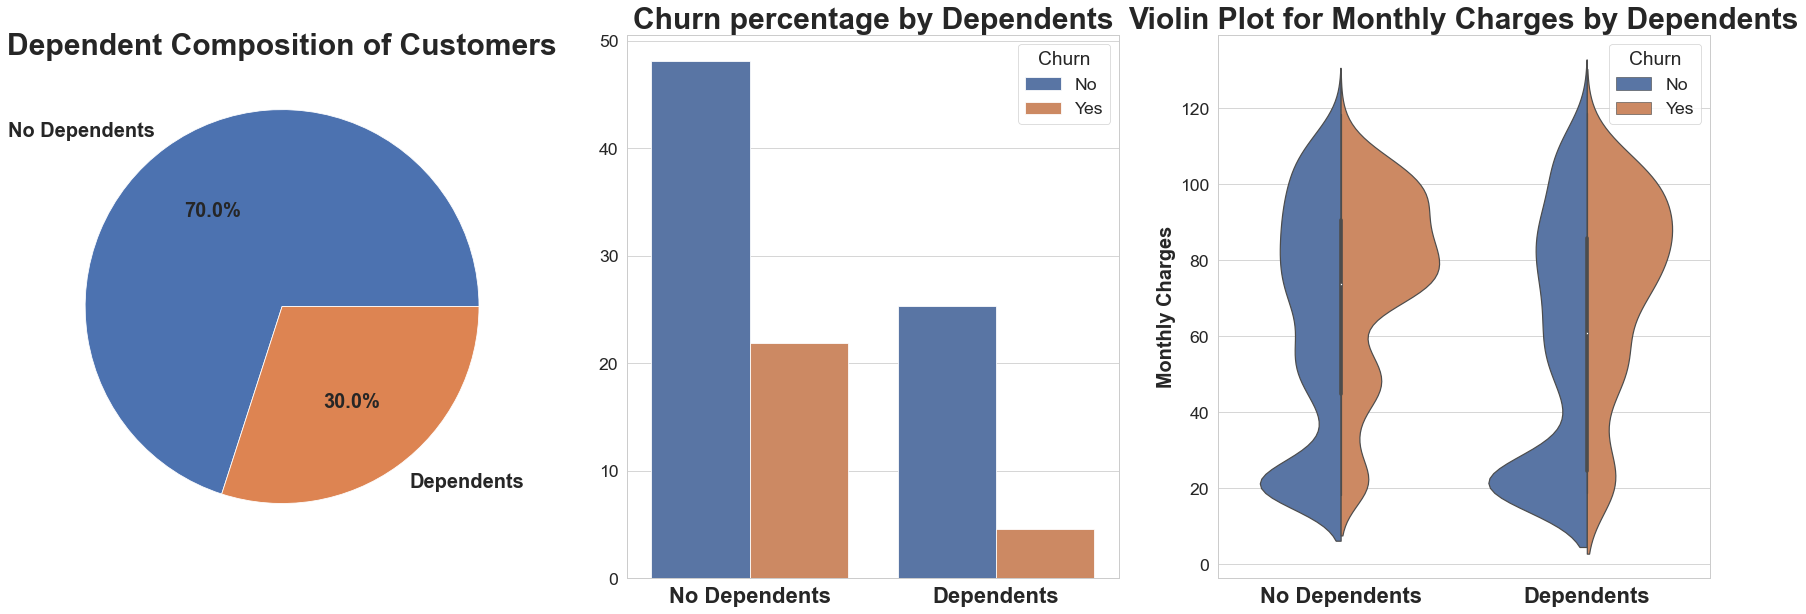

In [14]:
dependents_plot(df)

**Comments:**
- Customers without dependents are more likely to churn than those with dependents

### 2.5 Phone Services & Line Quantity

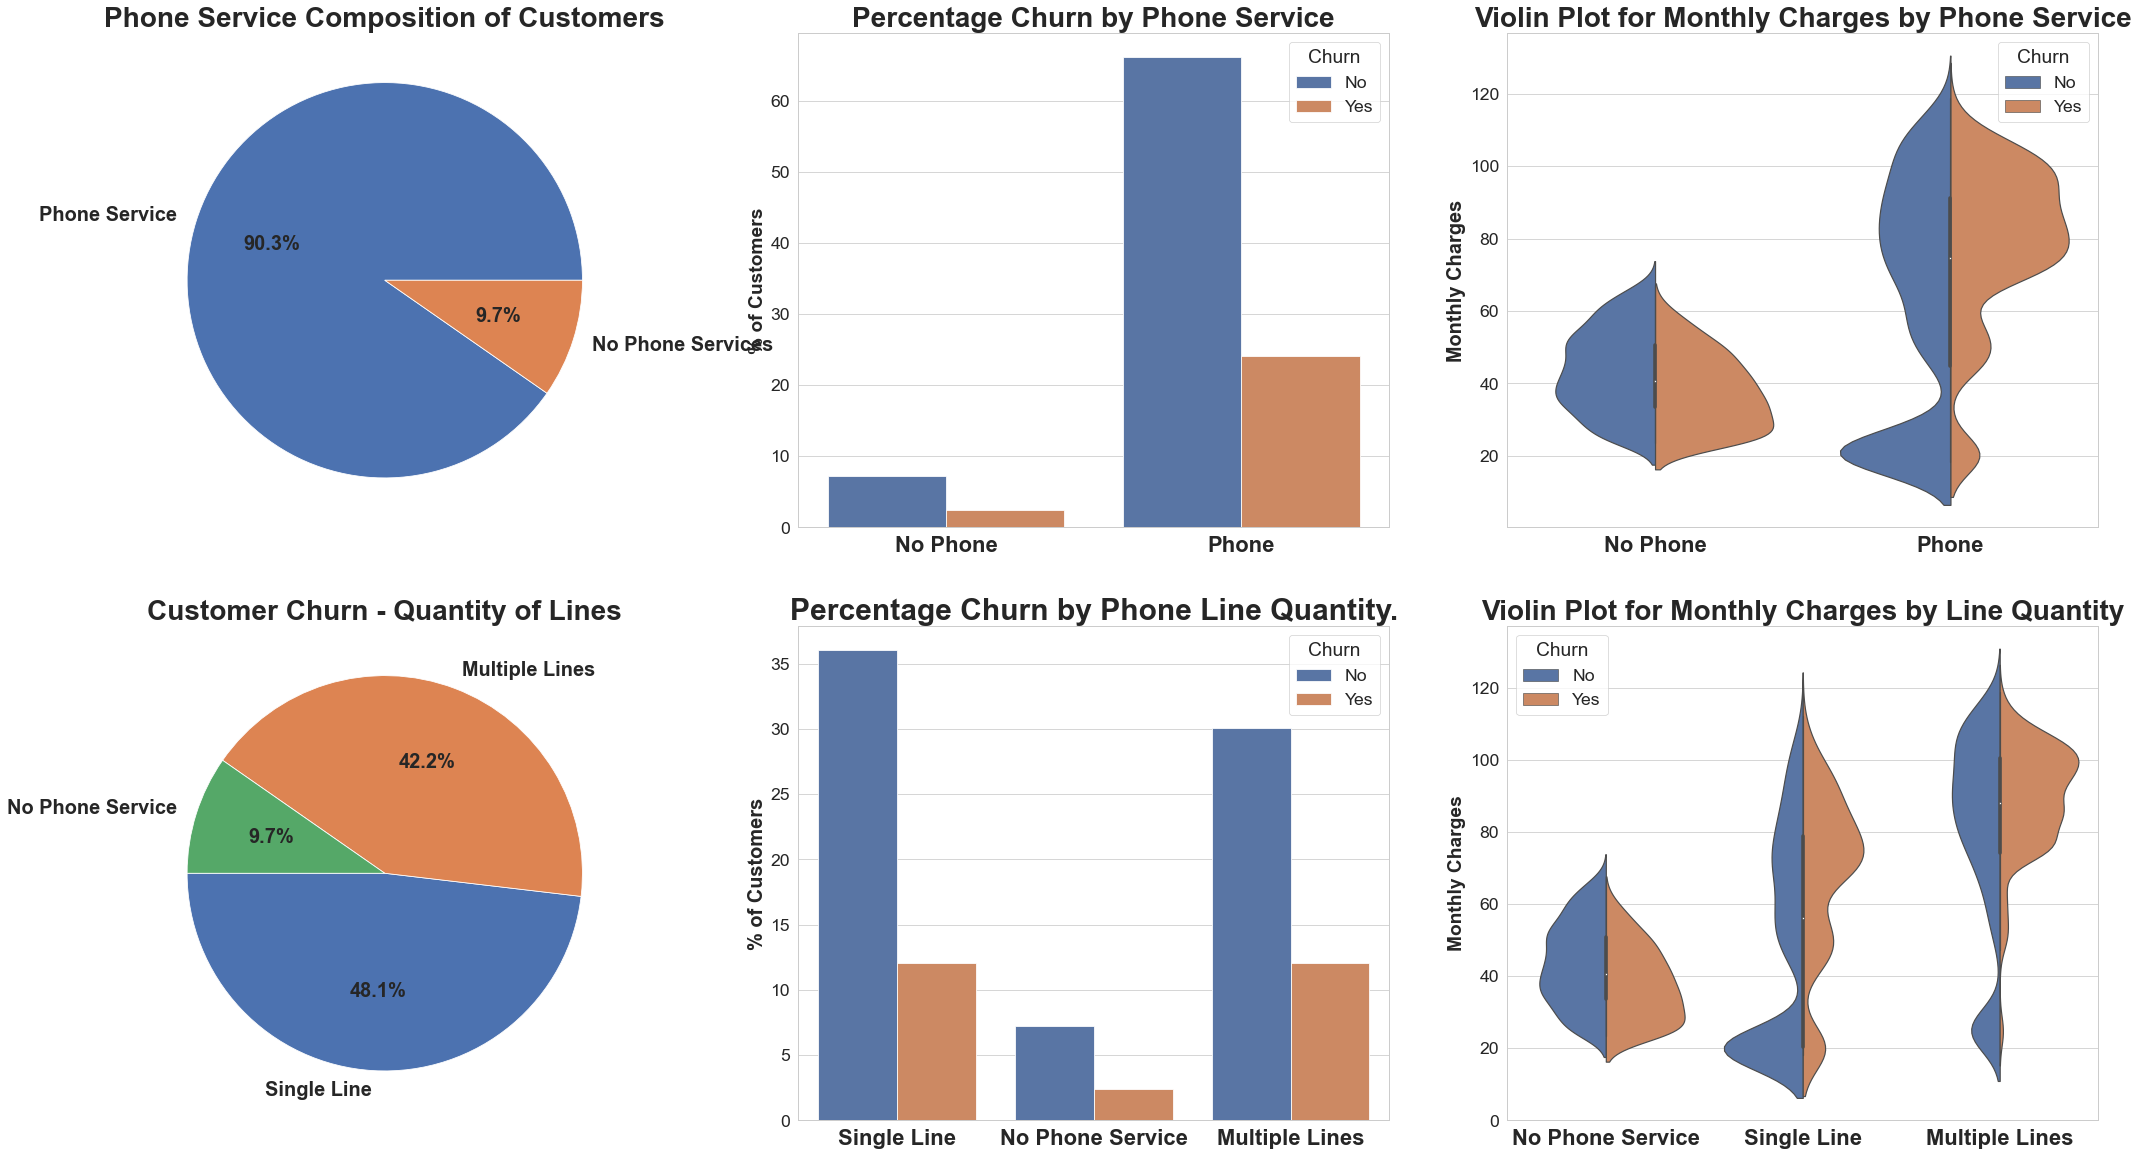

In [15]:
phone_services_plots(df)

**Comments:**
- Over 90% of customers use phone services
- Customers with phone service churn by about 25% of the time
- Customers with phone services pay a higher average monthly charge than those without phone services
- Customers with multiple lines churn at approximately the same rate as those with a singular line
- Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone lines

### 2.6 Internet Service

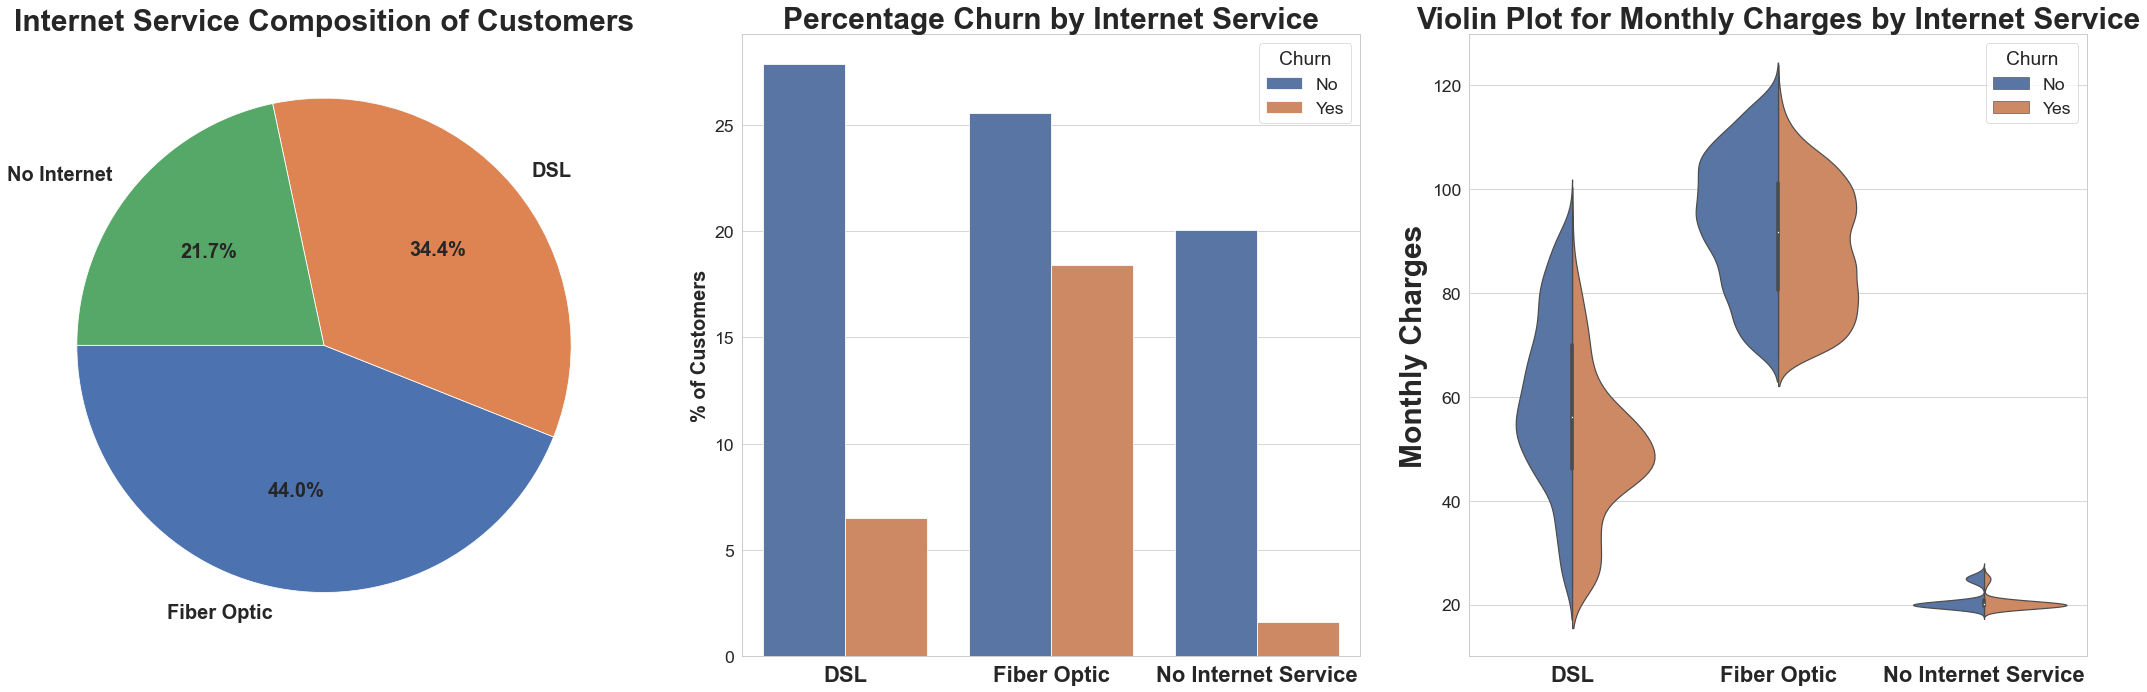

In [16]:
internet_services_plot(df)

**Comments:**
- Customers who donot use internet services are less than one-quarter of the overall customer base
- Overall, Customers who use Fibre Optic churn more than those who use DSL
- Customers who use Fibre Optic more frequently pay a higher monthly charge than those with DSL 


### 2.7 Contracts

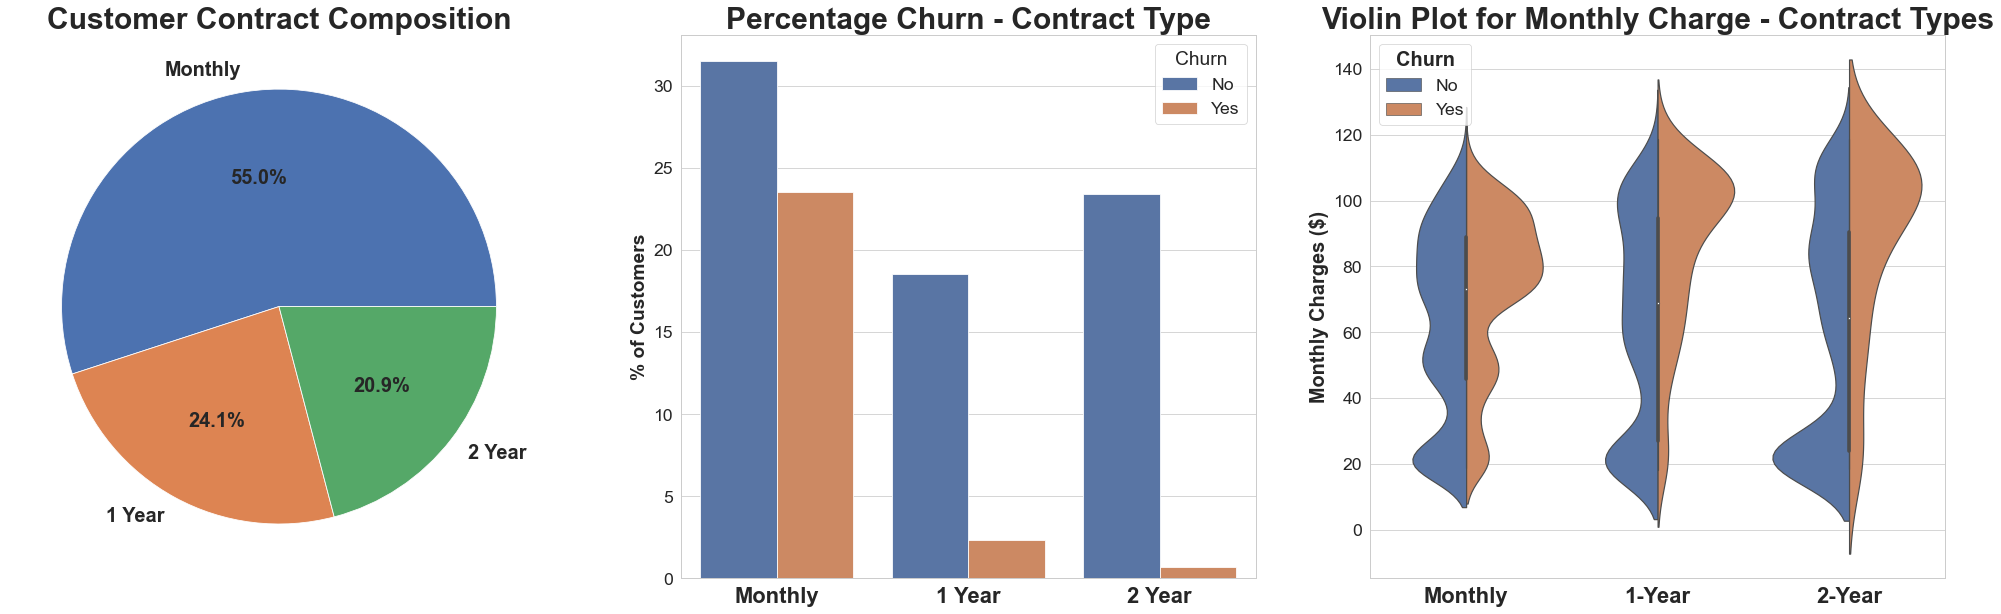

In [17]:
contracts_plot(df)

**Comments:**
- More than half of customers use a monthly payment option
- Significantly more customers churn on monthly plans
- The longer the contract plan, the lower the churn rate

### 2.8 Paperless Billing

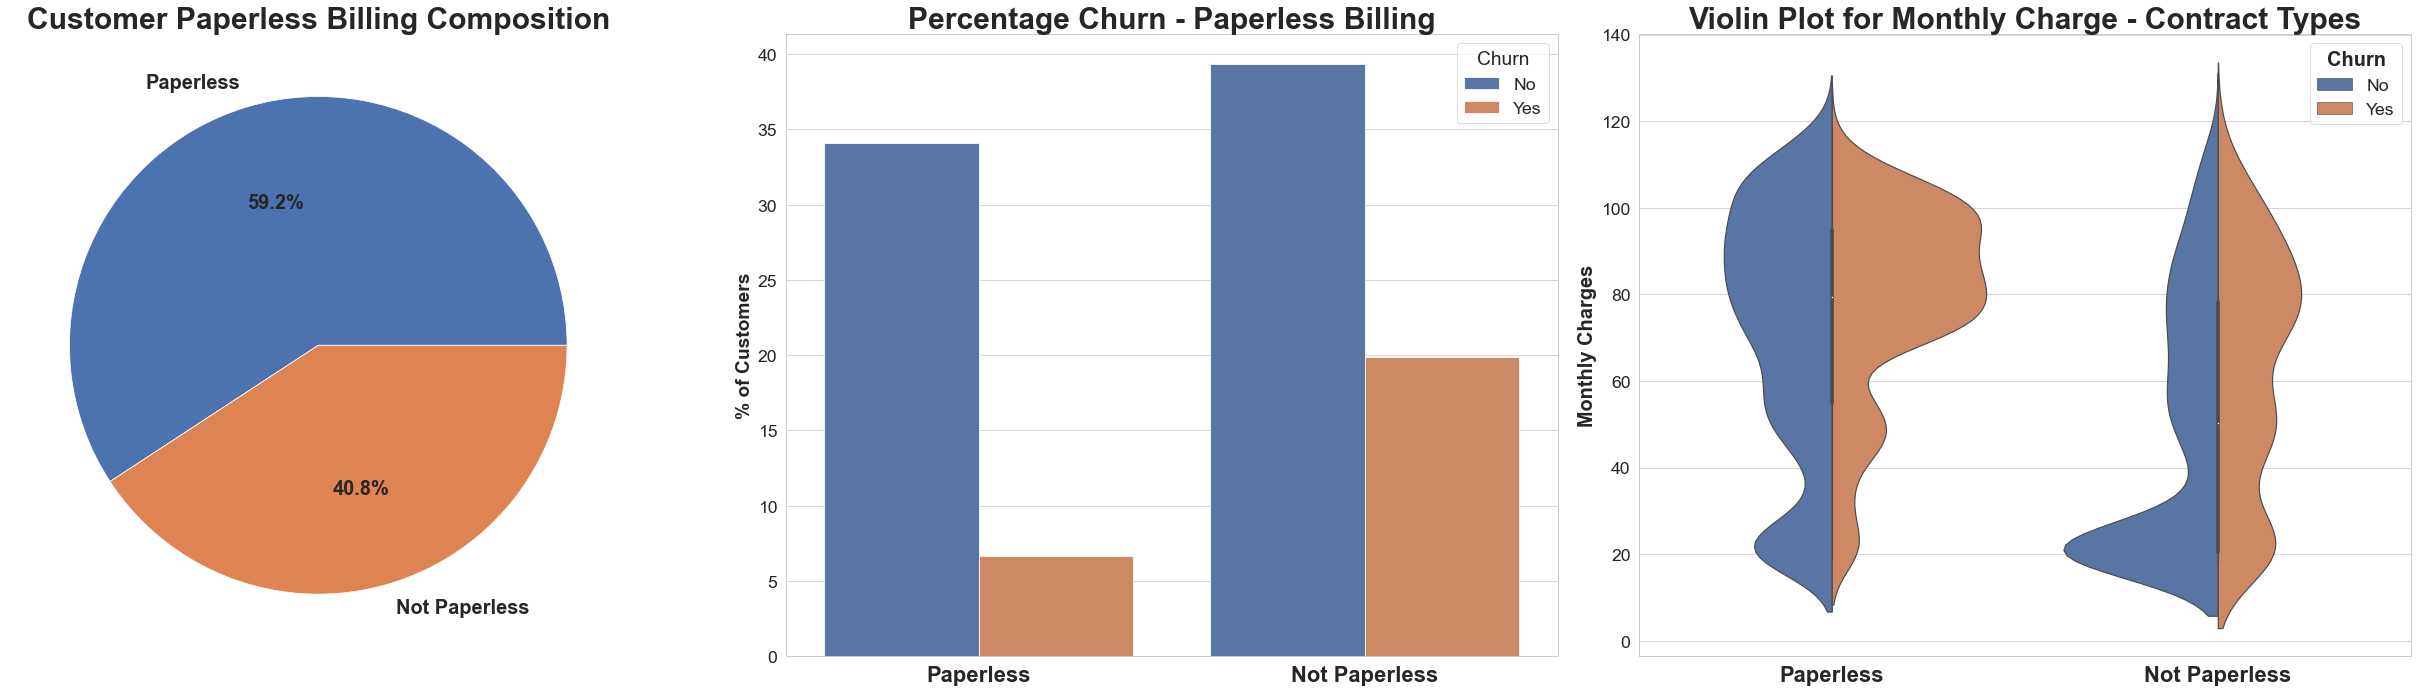

In [18]:
paperless_plot(df)

**Comments:**

- About 59.2% of customers use paperless billing
- Customers with non-paperless billing churn significantly more than paperless customers


### 2.9 Payment Methods

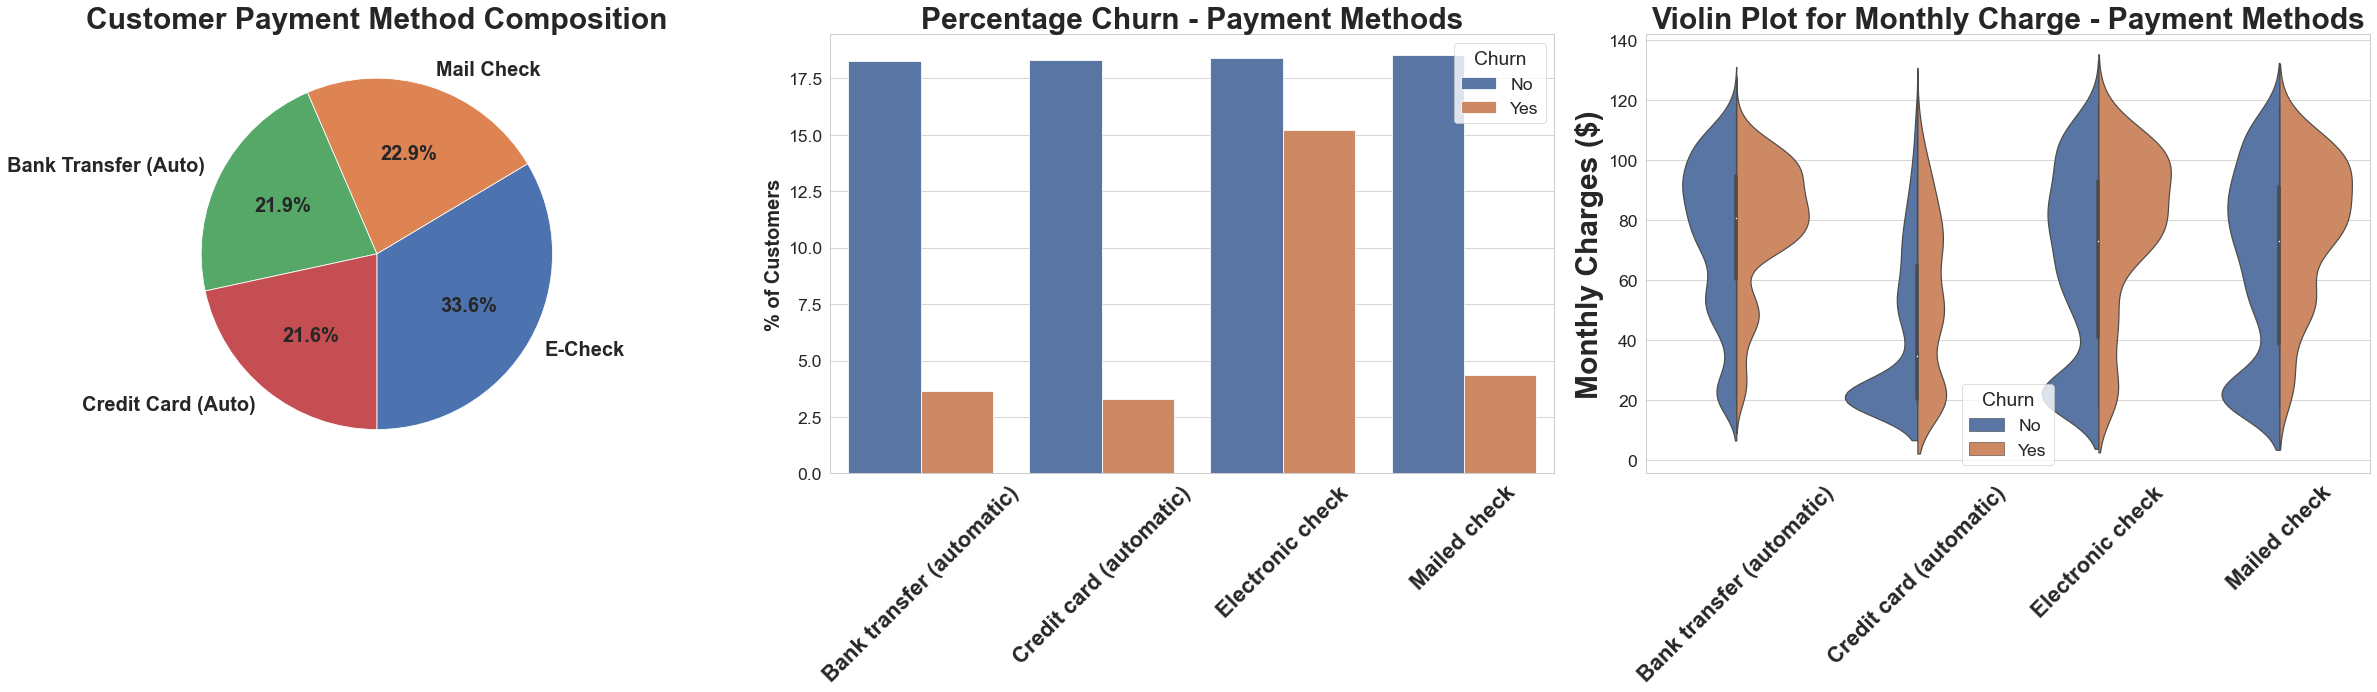

In [19]:
payment_methods_plot(df)

**Comments:**
- Customers who pay with Electronic-check churn more than customers with all other payment methods
- Customers who pay by credit card have consistent churn rates regardless of monthly charge

### 2.10 Add_On Services

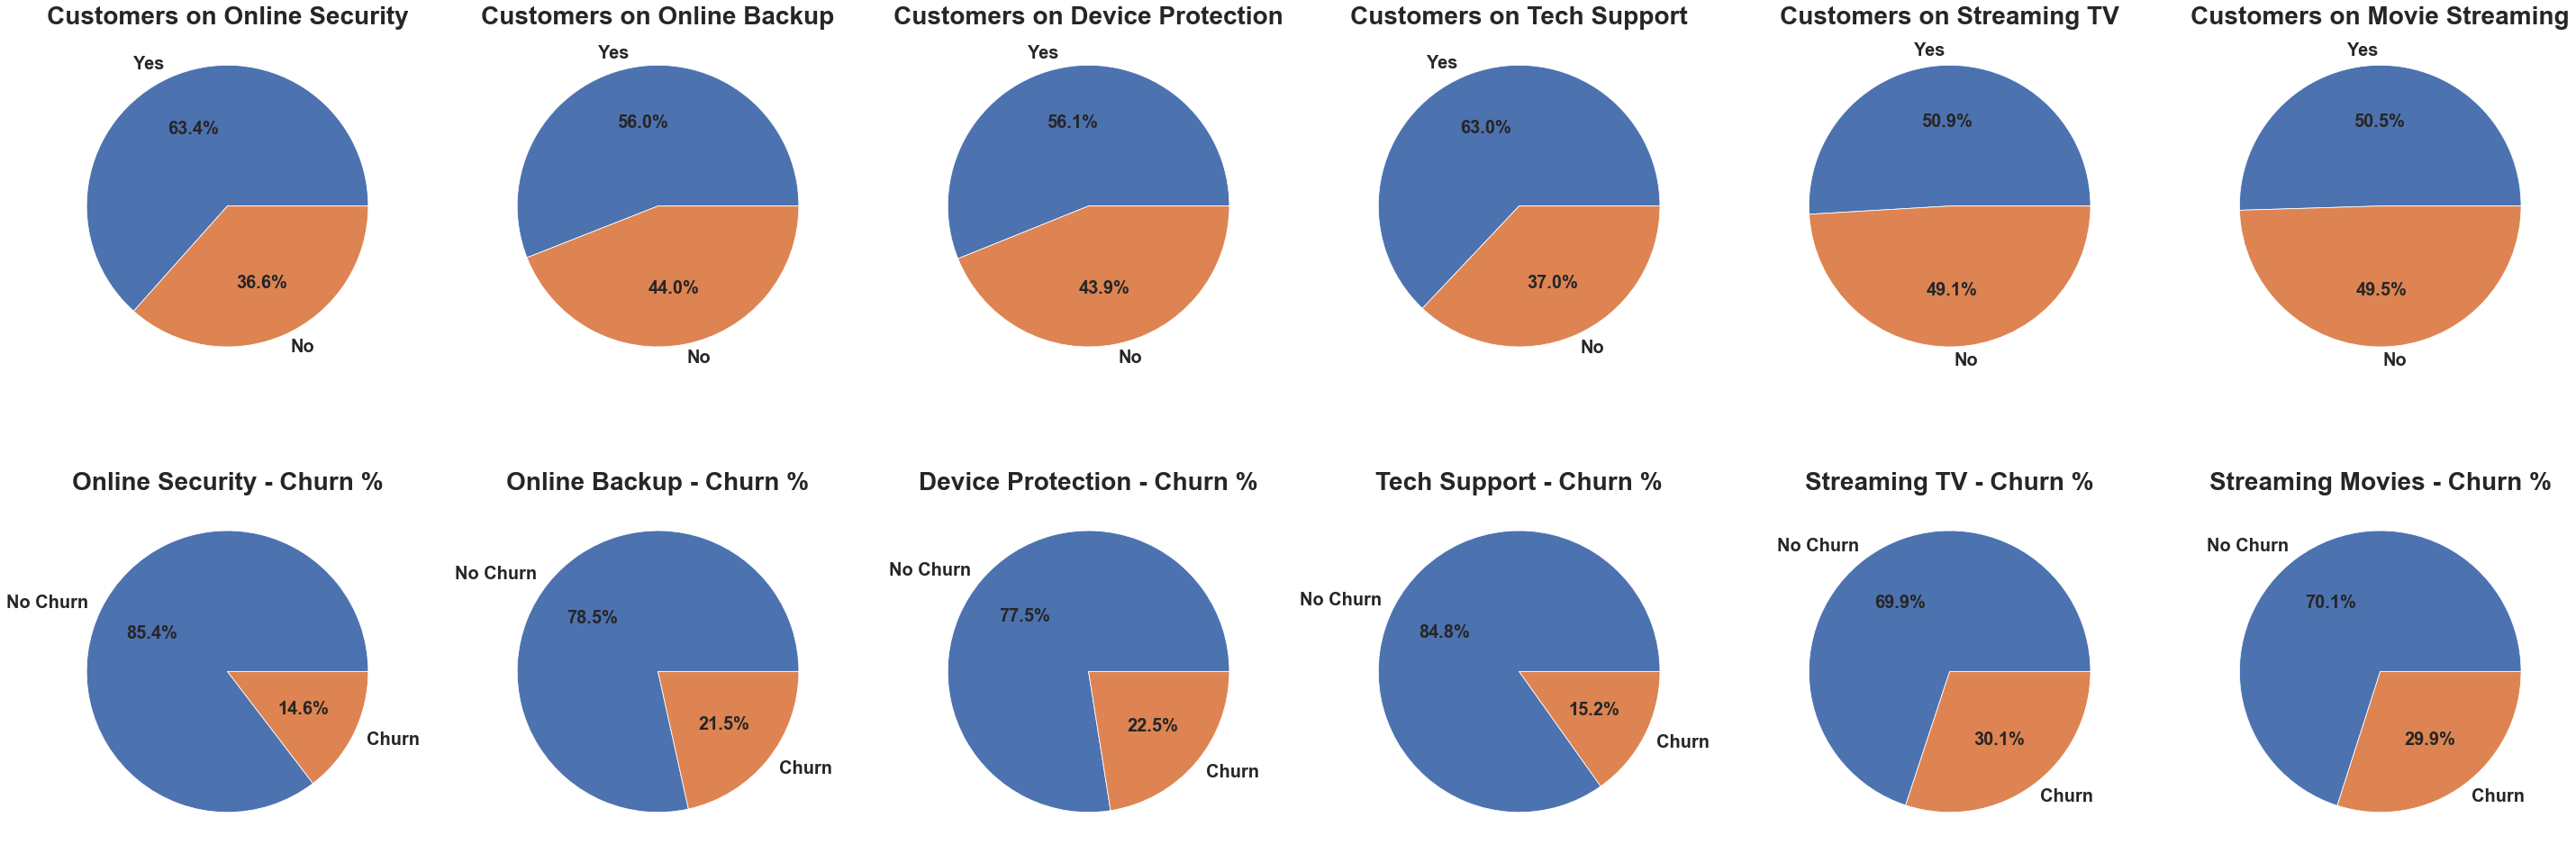

In [20]:
add_services_plot(df)

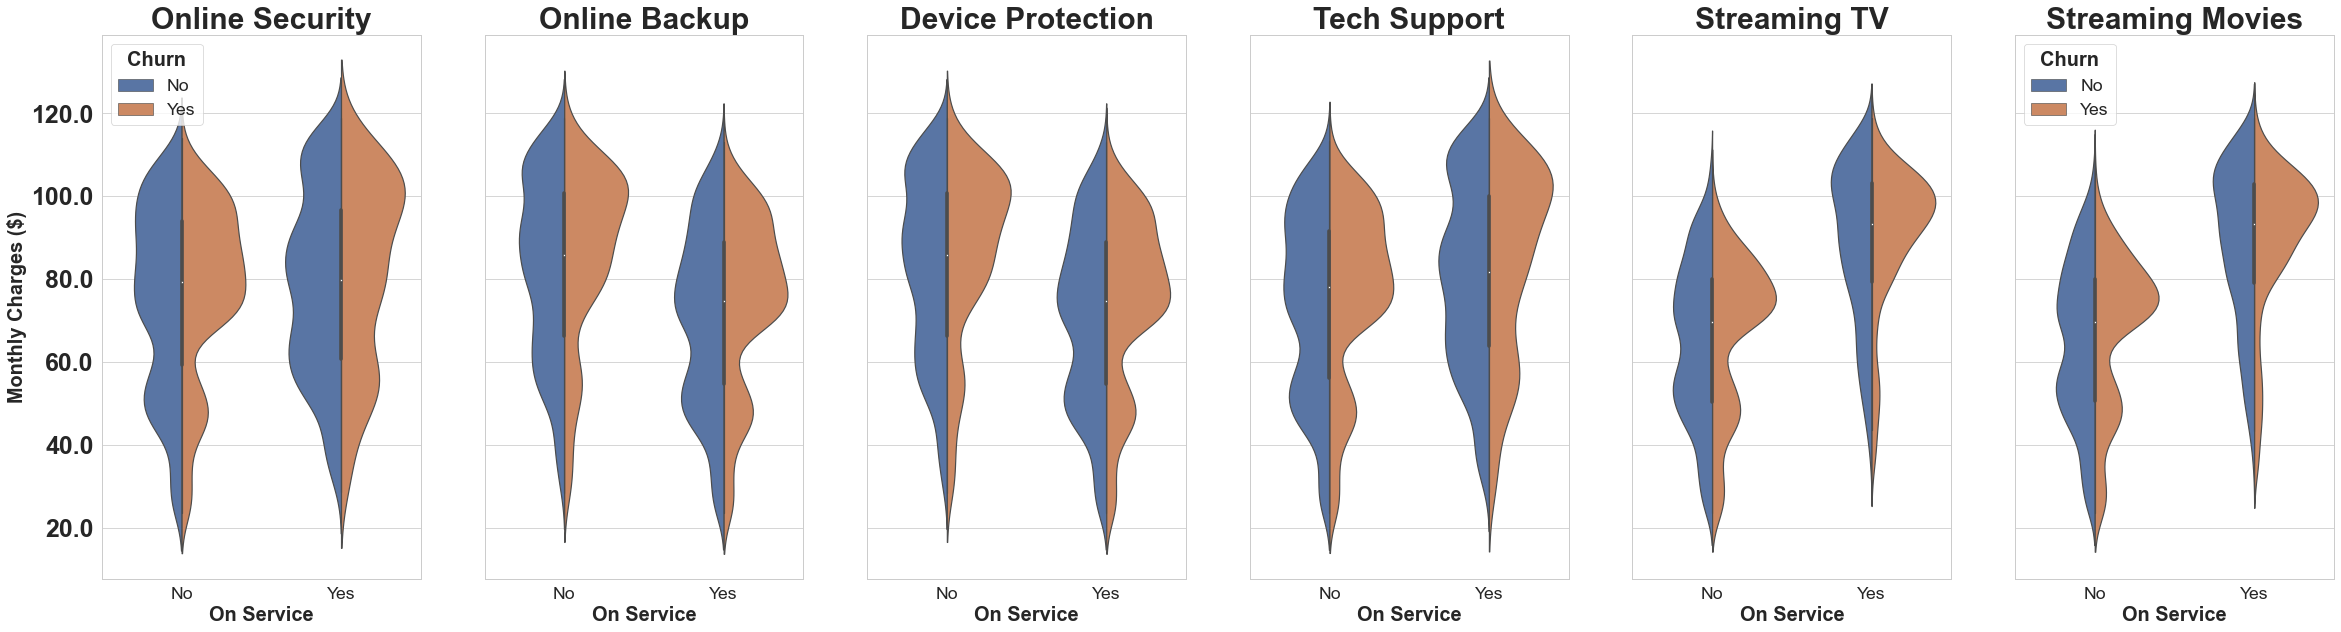

In [21]:
service_charges_plot(df)

**Comments:**
- Customers with TV Streaming and/or Movie streaming services churn more than all other services.


### **3 Numerical Feature EDA**

In [22]:
def tenure_groupings(df):
    if df.tenure <= 12:
        return "less_than_1yr"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2yr"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3yr"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4yr"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5yr"
    else:
        return "greater_than_5yr"

df['tenure_group'] = df.apply(lambda df: tenure_groupings(df), axis = 1)
    
def tenure_group_churn(df):
    plt.figure(figsize = (14,8))
    graph = sns.countplot(data = df, x = 'tenure_group', hue = 'Churn', order = [
        'less_than_1yr', 'less_than_2yr', 'less_than_3yr', 'less_than_4yr', 'less_than_5yr', 'greater_than_5yr'])
    graph.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    graph.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    graph.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    graph.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()
    
def plt_numerical_averages(df, feature):
    fig = plt.figure(figsize = (12, 8))
    graph = sns.barplot(data = df, x = 'tenure_group', y = feature, hue = 'Churn', order = [
        'less_than_1yr', 'less_than_2yr', 'less_than_3yr', 'less_than_4yr', 'less_than_5yr', 'greater_than_5yr'])
    graph.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    graph.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    graph.set_title(f'Average {feature} by Tenure Group(Churn vs No Churn)', fontsize = 30, fontweight = 'bold')
    graph.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
    
def kde_plot(df, feature):
    plt.figure(figsize = (12, 5))
    plt.title(f"Kernel Density Estimation for {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.Churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2, legend = True)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.Churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2, legend = True)
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()
    
    

### 3.1 Visualising Trend of Customer Churning by Tenure

In [23]:
#df['tenure_group'] = df.apply(lambda df: tenure_groupings(df), axis = 1)

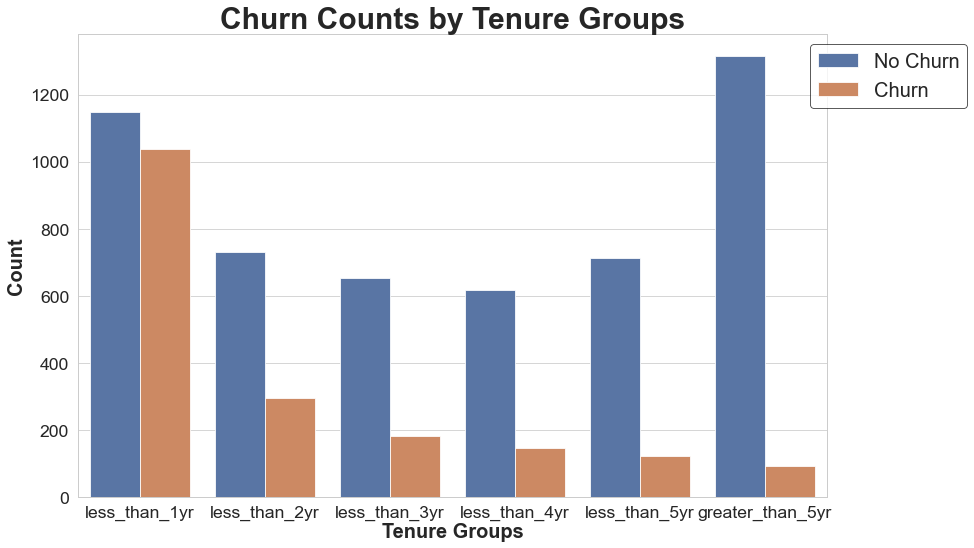

In [24]:
tenure_group_churn(df)

### 3.2 Visualisation of average monthly charges by Tenure group of Customers (Churn vs No Churn)

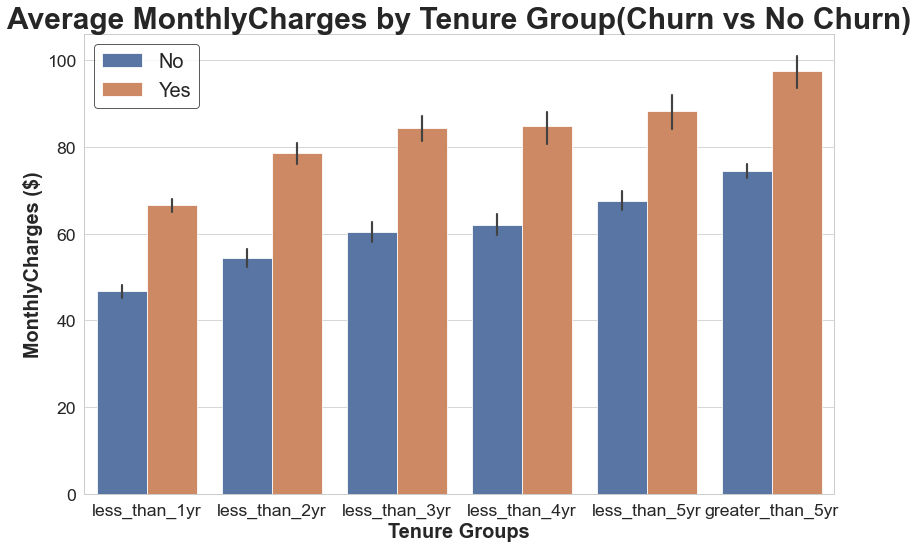

In [25]:
plt_numerical_averages(df, 'MonthlyCharges')

### 3.3 Visualisation of average Total charges by Tenure group of Customers (Churn vs No Churn)

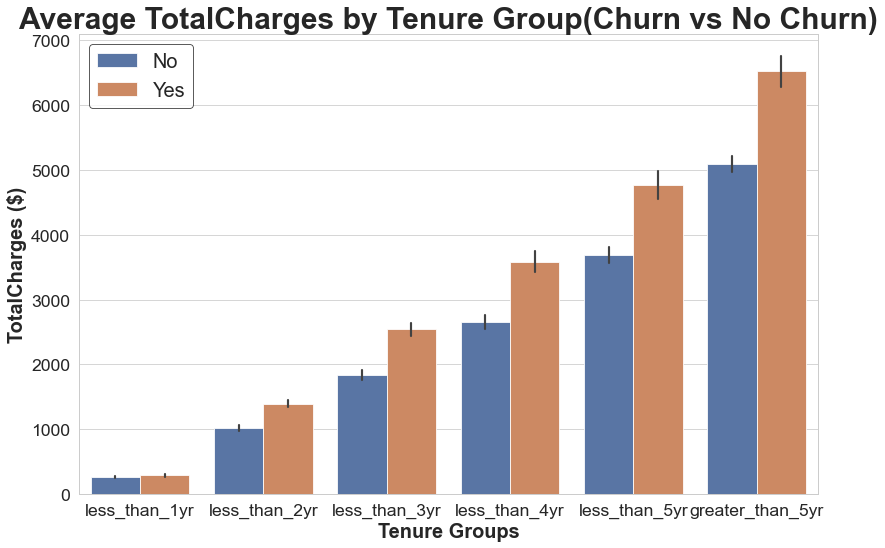

In [26]:
plt_numerical_averages(df, 'TotalCharges')

### 3.4 Visualising the distribution of Numerical Features (Tenure, Monthly Charges, Total Charges)

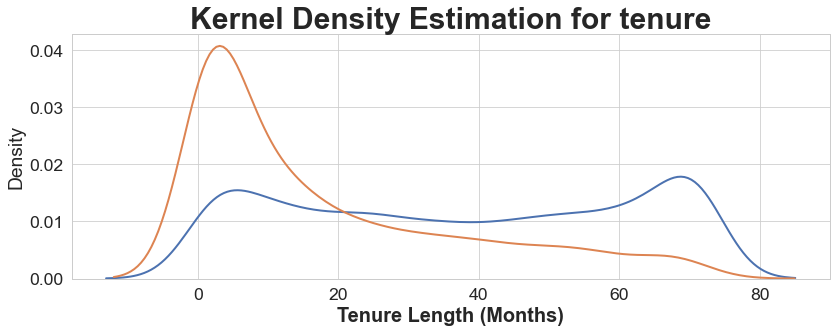

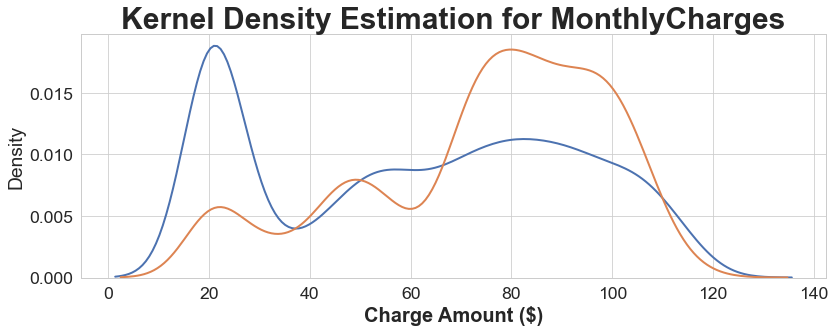

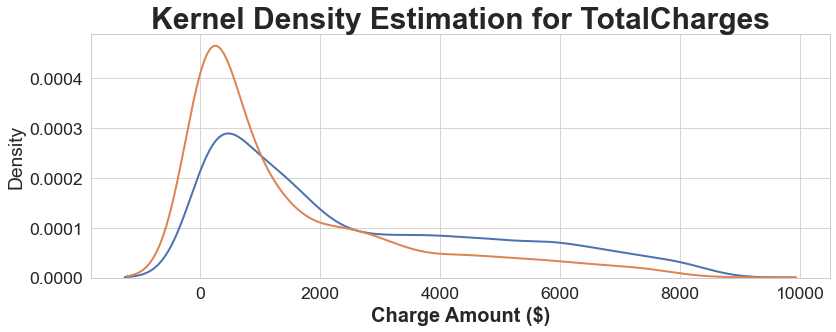

In [27]:
kde_plot(df, 'tenure')
kde_plot(df, 'MonthlyCharges')
kde_plot(df, 'TotalCharges')

**Numeric Variable Comments:**

**Tenure:** Chances of customers churning reduce as they spend longer tenure with company. Customers tend to churn more when they are less than one year as compared to customers who have longer tenure.

**Monthly Charges:** The likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars.

**Total Charges:** Distributions mostly too general to make inferences.

## **Feature Engineering**

In [28]:
pd.set_option("display.max_columns", None) # Setting all columns to maximum display

In [29]:
original_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85     29.850000   
1               No               Mailed check           56.95   1889.500000   
2              Yes               Mailed check           53.85    108.150002   
3               No  Bank transfer (automatic)           42.30   1840.750000   
4              Yes           Electronic check           70.70    151.649994   

  Churn   tenure_group  
0    No  less_than_1yr  
1    No  less_than_3yr  
2   Yes  less_than_1yr  
3    No  less_than_4yr  
4   Yes  less_than_1yr

In [30]:
# Converting SeniorCitizen into categorical feature
original_df.SeniorCitizen.replace(0, "No", inplace = True)
original_df.SeniorCitizen.replace(1, "Yes", inplace = True)

# Label Encoding target column
original_df.Churn.replace("No", 0, inplace = True)
original_df.Churn.replace("Yes", 1, inplace = True)


In [31]:
target_col = original_df['Churn']
train_df = original_df.drop(columns = ['Churn'])

In [32]:
# for percent [0; 100] of nan in dataframe
features = train_df.columns
missing_threshold = 50
check = (original_df[features].isna().sum() / ((original_df.shape[0]) / 100))

valid_features = check[check < missing_threshold].index.to_list()
check.sort_values(ascending=False)

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
tenure_group        0.0
dtype: float64

In [33]:
original_df[valid_features].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
useless_features = ["customerID"]
useful_features = list(set(valid_features) - set(useless_features))
print(f"[Info] '{len(useful_features)}' feature(s) to use for the next steps. ")

[Info] '20' feature(s) to use for the next steps. 


In [35]:
num_cols = original_df[useful_features].select_dtypes(include=np.number).columns.tolist()
cat_cols = original_df[useful_features].select_dtypes(exclude=np.number).columns.tolist()

print( f"Numeric features : {len(num_cols)}" )
print( f"Categorical features : {len(cat_cols)}" )

Numeric features : 3
Categorical features : 17


#### Splitting Data into Predictor and Response Variable

In [36]:
X = X = original_df[useful_features]
y = target_col





#### Splitting Data into Train and Test data

In [37]:
# Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52)
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((4930, 20), (4930,)), ((2113, 20), (2113,)))

## Normalization and Encoding the dataset

In [38]:
# Pipeline for the Numeric features 
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", MinMaxScaler())]
)

# Pipeline for the Categorical features
encoder_categories = [ original_df[cat_cols[i] ].dropna().unique() for i in range(len(cat_cols)) ]

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", preprocessing.OneHotEncoder(categories=encoder_categories, drop="first", sparse=False)) #if_binary
           ])
# Associate the two pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, selector(dtype_include="number")),
        ("cat", cat_transformer, selector(dtype_exclude="number")),
        # ("num", num_transformer, num_cols),
        # ("cat", cat_transformer, cat_cols),
    ]
)
X_train_, X_test_ = preprocessor.fit_transform(X_train), preprocessor.transform(X_test)
        
# New categorical feature names
feature_names_out = preprocessor.named_transformers_['cat'][-1].get_feature_names_out().tolist()
indexes = [ int(feature_names_out[i][1:feature_names_out[i].find("_")]) for i in range(len(feature_names_out))]
cat_cols_encoded = [  col.replace( f"x{i}", cat_cols[i] )  for col,i in zip(feature_names_out, indexes)]
print( f"Categorical features after encoding : {len(cat_cols_encoded)}" )

# train df
df_X_train = pd.DataFrame(X_train_, columns=num_cols+cat_cols_encoded)

# test df
df_X_test = pd.DataFrame(X_test_, columns=num_cols+cat_cols_encoded)

Categorical features after encoding : 32


In [39]:
df_X_train.head()

tenure  TotalCharges  MonthlyCharges  OnlineSecurity_Yes  \
0  0.055556      0.038930        0.567514                 0.0   
1  0.166667      0.080180        0.351271                 0.0   
2  0.430556      0.078672        0.025411                 0.0   
3  0.277778      0.209613        0.703538                 0.0   
4  0.944444      0.706142        0.702043                 1.0   

   OnlineSecurity_No internet service  PaperlessBilling_No  Partner_No  \
0                                 0.0                  1.0         1.0   
1                                 0.0                  1.0         0.0   
2                                 1.0                  1.0         1.0   
3                                 0.0                  0.0         0.0   
4                                 0.0                  0.0         0.0   

   Contract_One year  Contract_Two year  tenure_group_less_than_3yr  \
0                0.0                0.0                         0.0   
1                1.0                0.0                         0.0   
2                1.0                0.0                         1.0   
3                0.0                0.0                         0.0   
4                0.0                1.0                         0.0   

   tenure_group_less_than_4yr  tenure_group_less_than_2yr  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         1.0   
4                         0.0                         0.0   

   tenure_group_greater_than_5yr  tenure_group_less_than_5yr  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            1.0                         0.0   

   MultipleLines_No  MultipleLines_Yes  InternetService_Fiber optic  \
0               0.0                1.0                          1.0   
1               1.0                0.0                          0.0   
2               1.0                0.0                          0.0   
3               1.0                0.0                          1.0   
4               0.0                1.0                          0.0   

   InternetService_No  PhoneService_Yes  Dependents_Yes  TechSupport_Yes  \
0                 0.0               1.0             0.0              0.0   
1                 0.0               1.0             1.0              0.0   
2                 1.0               1.0             0.0              0.0   
3                 0.0               1.0             0.0              0.0   
4                 0.0               1.0             1.0              1.0   

   TechSupport_No internet service  StreamingTV_Yes  \
0                              0.0              0.0   
1                              0.0              0.0   
2                              1.0              0.0   
3                              0.0              1.0   
4                              0.0              1.0   

   StreamingTV_No internet service  SeniorCitizen_Yes  gender_Male  \
0                              0.0                0.0          0.0   
1                              0.0                0.0          1.0   
2                              1.0                0.0          0.0   
3                              0.0                0.0          1.0   
4                              0.0                0.0          1.0   

   OnlineBackup_No  OnlineBackup_No internet service  \
0              1.0                               0.0   
1              1.0                               0.0   
2              0.0                               1.0   
3              1.0                               0.0   
4              0.0                               0.0   

   PaymentMethod_

In [40]:
df_X_test.head()

tenure  TotalCharges  MonthlyCharges  OnlineSecurity_Yes  \
0  0.152778      0.096485        0.578974                 0.0   
1  0.930556      0.192538        0.066766                 0.0   
2  0.944444      0.160741        0.015944                 0.0   
3  0.486111      0.245308        0.424514                 1.0   
4  0.416667      0.150585        0.260090                 0.0   

   OnlineSecurity_No internet service  PaperlessBilling_No  Partner_No  \
0                                 0.0                  0.0         1.0   
1                                 1.0                  1.0         1.0   
2                                 1.0                  0.0         1.0   
3                                 0.0                  1.0         0.0   
4                                 0.0                  0.0         1.0   

   Contract_One year  Contract_Two year  tenure_group_less_than_3yr  \
0                0.0                0.0                         0.0   
1                0.0                1.0                         0.0   
2                0.0                1.0                         0.0   
3                0.0                0.0                         1.0   
4                0.0                0.0                         1.0   

   tenure_group_less_than_4yr  tenure_group_less_than_2yr  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   tenure_group_greater_than_5yr  tenure_group_less_than_5yr  \
0                            0.0                         0.0   
1                            1.0                         0.0   
2                            1.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   

   MultipleLines_No  MultipleLines_Yes  InternetService_Fiber optic  \
0               0.0                1.0                          1.0   
1               0.0                1.0                          0.0   
2               1.0                0.0                          0.0   
3               1.0                0.0                          0.0   
4               0.0                0.0                          0.0   

   InternetService_No  PhoneService_Yes  Dependents_Yes  TechSupport_Yes  \
0                 0.0               1.0             0.0              0.0   
1                 1.0               1.0             0.0              0.0   
2                 1.0               1.0             0.0              0.0   
3                 0.0               1.0             0.0              0.0   
4                 0.0               0.0             1.0              0.0   

   TechSupport_No internet service  StreamingTV_Yes  \
0                              0.0              0.0   
1                              1.0              0.0   
2                              1.0              0.0   
3                              0.0              0.0   
4                              0.0              1.0   

   StreamingTV_No internet service  SeniorCitizen_Yes  gender_Male  \
0                              0.0                0.0          0.0   
1                              1.0                1.0          1.0   
2                              1.0                1.0          1.0   
3                              0.0                0.0          1.0   
4                              0.0                0.0          1.0   

   OnlineBackup_No  OnlineBackup_No internet service  \
0              1.0                               0.0   
1              0.0                               1.0   
2              0.0                               1.0   
3              0.0                               0.0   
4              1.0                               0.0   

   PaymentMethod_

### Overcoming Class Imbalance using SMOTE sampling Techniques

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 27, sampling_strategy = 1.0)
df_X_train_re, y_train_re = smt.fit_resample(df_X_train, y_train)

## **Model Building**
After engineering our features, the next step is to build an accurate model with our features.
Some classification models we will build are:
- Decision Tree Modeel
- Gradient Boosting Model
- Logistic Regression Model
- Stochastic Gradient Descent
- K-Nearest Neighbours
- Random Forest Model
- Support Vector machines 

Firstly, I will train Decision Tree Modeel as baseline model and evaluate all other models against it to select the most accurate model

#### 1. Decision Tree Classifier Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

In [43]:

model_1 = DecisionTreeClassifier(random_state = 18)
model_1.fit(df_X_train_re, y_train_re)

DecisionTreeClassifier(random_state=18)

In [44]:
pred_1 = model_1.predict(df_X_test)

In [45]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_1)}")
print(f"Recall Score: {recall_score(y_test, pred_1)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_1)}")
print(f"F1 Score: {f1_score(y_test, pred_1)}")

Precision Score: 0.46063651591289784
Recall Score: 0.4841549295774648
Accuracy Score: 0.7089446284902982
F1 Score: 0.47210300429184554


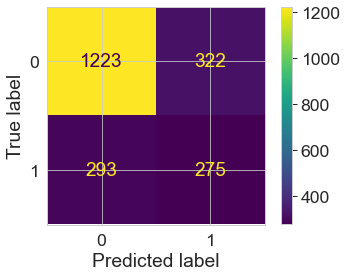

In [46]:
plot_confusion_matrix(model_1, df_X_test, y_test)  
plt.show()

#### 2. Gradient Boosting Classifier Model

In [47]:
#from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=16)
model_2.fit(df_X_train_re, y_train_re)

GradientBoostingClassifier(max_depth=1, random_state=16)

In [49]:
pred_2 = model_2.predict(df_X_test)

In [50]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_2)}")
print(f"Recall Score: {recall_score(y_test, pred_2)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_2)}")
print(f"F1 Score: {f1_score(y_test, pred_2)}")

Precision Score: 0.5652724968314322
Recall Score: 0.7852112676056338
Accuracy Score: 0.7799337434926644
F1 Score: 0.6573323507737656


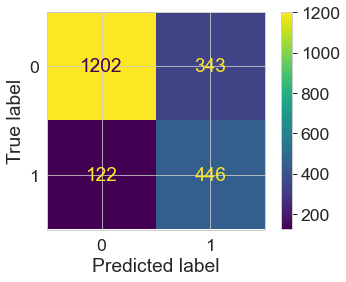

In [51]:
plot_confusion_matrix(model_2, df_X_test, y_test)  
plt.show()

#### 3. Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(random_state = 10)
model_3.fit(df_X_train_re, y_train_re)

LogisticRegression(random_state=10)

In [53]:
pred_3 = model_3.predict(df_X_test)

In [54]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_3)}")
print(f"Recall Score: {recall_score(y_test, pred_3)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_3)}")
print(f"F1 Score: {f1_score(y_test, pred_3)}")

Precision Score: 0.5507246376811594
Recall Score: 0.8028169014084507
Accuracy Score: 0.7709417889256981
F1 Score: 0.6532951289398281


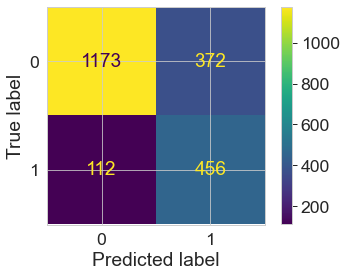

In [55]:
# Create and print a confusion matrix 
plot_confusion_matrix(model_3, df_X_test, y_test)  
plt.show()

#### 4. Stochastic Gradient Descent

In [56]:
from sklearn.linear_model import SGDClassifier
model_4 = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 32)
model_4.fit(df_X_train_re, y_train_re)

SGDClassifier(loss='modified_huber', random_state=32)

In [57]:
pred_4 = model_4.predict(df_X_test)

In [58]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_4)}")
print(f"Recall Score: {recall_score(y_test, pred_4)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_4)}")
print(f"F1 Score: {f1_score(y_test, pred_4)}")

Precision Score: 0.4983991462113127
Recall Score: 0.8221830985915493
Accuracy Score: 0.7297681022243256
F1 Score: 0.6205980066445184


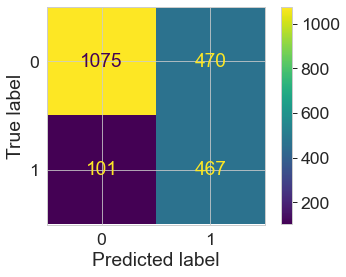

In [59]:
# Create and print a confusion matrix 
plot_confusion_matrix(model_4, df_X_test, y_test)  
plt.show()

#### 5. K-Nearest Neighbours Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


Text(0, 0.5, 'WCSS')

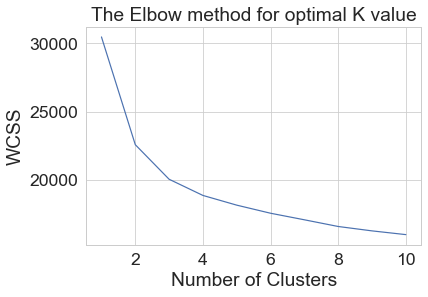

In [61]:
""" Finding the optimal K value using the Elbow method"""

wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df_X_train)
    wcss.append(clustering.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method for optimal K value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within Cluster sum of squares

In [62]:
model_5 = KNeighborsClassifier(n_neighbors = 3)
model_5.fit(df_X_train_re, y_train_re)

KNeighborsClassifier(n_neighbors=3)

In [63]:
pred_5 = model_5.predict(df_X_test)

In [64]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_5)}")
print(f"Recall Score: {recall_score(y_test, pred_5)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_5)}")
print(f"F1 Score: {f1_score(y_test, pred_5)}")

Precision Score: 0.44052863436123346
Recall Score: 0.704225352112676
Accuracy Score: 0.6800757217226692
F1 Score: 0.5420054200542005


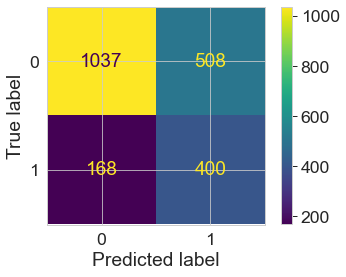

In [65]:
# Create and print a confusion matrix 
plot_confusion_matrix(model_5, df_X_test, y_test)  
plt.show()

#### 6. Random Forest Classifier Model

In [66]:
from sklearn.ensemble import RandomForestClassifier
model_6 = RandomForestClassifier(n_estimators = 60, oob_score = True, n_jobs = -1, 
                    random_state = 32, max_features = None, min_samples_leaf = 30)
model_6.fit(df_X_train_re, y_train_re)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=60,
                       n_jobs=-1, oob_score=True, random_state=32)

In [67]:
pred_6 = model_6.predict(df_X_test)

In [68]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_6)}")
print(f"Recall Score: {recall_score(y_test, pred_6)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_6)}")
print(f"F1 Score: {f1_score(y_test, pred_6)}")

Precision Score: 0.5517241379310345
Recall Score: 0.7605633802816901
Accuracy Score: 0.7695220066256507
F1 Score: 0.6395262768319763


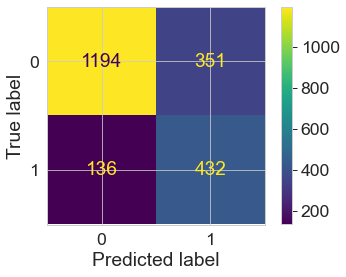

In [69]:
# Create and print a confusion matrix 
plot_confusion_matrix(model_6, df_X_test, y_test)  
plt.show()

#### 7. Support Vector Machine

In [70]:
from sklearn.svm import SVC
model_7 = SVC(kernel = 'linear', C = 0.025, random_state = 15)
model_7.fit(df_X_train_re, y_train_re)

SVC(C=0.025, kernel='linear', random_state=15)

In [71]:
pred_7 = model_7.predict(df_X_test)

In [72]:
# Calculate and print all four major metrics
print(f"Precision Score: {precision_score(y_test, pred_7)}")
print(f"Recall Score: {recall_score(y_test, pred_7)}")
print(f"Accuracy Score: {accuracy_score(y_test, pred_7)}")
print(f"F1 Score: {f1_score(y_test, pred_7)}")

Precision Score: 0.5092091007583965
Recall Score: 0.8274647887323944
Accuracy Score: 0.7392333175579744
F1 Score: 0.630449362843729


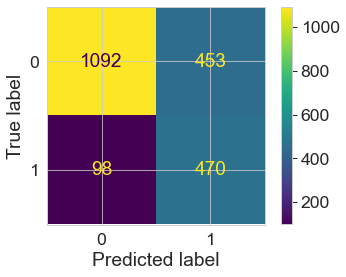

In [73]:
# Create and print a confusion matrix 
plot_confusion_matrix(model_7, df_X_test, y_test)  
plt.show()

## **Model Selection**

In [74]:
print(f"F1 Score for Model 1: {f1_score(y_test, pred_1)}")
print(f"F1 Score for Model 2: {f1_score(y_test, pred_2)}")
print(f"F1 Score for Model 3: {f1_score(y_test, pred_3)}")
print(f"F1 Score for Model 4: {f1_score(y_test, pred_4)}")
print(f"F1 Score for Model 5: {f1_score(y_test, pred_5)}")
print(f"F1 Score for Model 6: {f1_score(y_test, pred_6)}")
print(f"F1 Score for Model 7: {f1_score(y_test, pred_7)}")

F1 Score for Model 1: 0.47210300429184554
F1 Score for Model 2: 0.6573323507737656
F1 Score for Model 3: 0.6532951289398281
F1 Score for Model 4: 0.6205980066445184
F1 Score for Model 5: 0.5420054200542005
F1 Score for Model 6: 0.6395262768319763
F1 Score for Model 7: 0.630449362843729


**Comments:**

From the F1 scores above, we can see that **Model 2** had the highest Score. So we will Select that and do Hyperparameter tunning and retrain it with the best parameters for best performance

#### **Hyperparameter tuning - Gradient boosting**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
print(GradientBoostingClassifier())

GradientBoostingClassifier()


In [76]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[50,100,150,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [77]:
frame1 = [df_X_train, df_X_test]
frame2 = [y_train, y_test]
X= pd.concat(frame1)
y= pd.concat(frame2)

In [78]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 500]})

In [79]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [80]:
display(cv)

Best parameters are: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 50}


0.735 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.735 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
0.735 + or -0.0 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 150}
0.783 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.736 + or -0.003 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.775 + or -0.006 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.787 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
0.8 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.752 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.786 + or -0.006 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
0.792 + or -0.009 for the {'learning_rate': 0.01, 'max_depth'

#### Applying best Parameters to Model 2 (GradientBoostingClassifier)

In [81]:
final_model = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_depth=1, random_state=16)

In [82]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", final_model)])
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A0317C820>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(cate...
       'Credit card (automatic)'], dtype=object),
                                                                                             array(['No', 'Yes', 'No internet service'], dtype=object),
                                                                                             array(['No', 'Yes', 'No internet service'], dtype=object)],
                                                                                 drop='first',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A0317C4F0>)])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1, max_depth=1,
                                            n_estimators=50,
                                            random_state=16))])

## **Model Interpretability**
We are going to implore SHAP in python to interprete our model. SHAP has optimised functions for interpreting trr based models and a odel agnostic explainer function for interpletting any black model for which the predictions are known.

In [83]:
import shap # Importing SHAP
shap.initjs() #Loading JS vis

In [84]:
# Creating an explainer for our selected model(model_2)
explainer = shap.TreeExplainer(model_2)

# Finding out the SHAP values using the explainer
shap_values = explainer.shap_values(df_X_test)

"""Expected/Base/Reference value : The value that will be predicted if we did not know
                    any feature of the current output"""

print('Expected value:', explainer.expected_value)

Expected value: [-0.06089364]


#### Local Interpretation

In [85]:
# Making prediction for the first row in X_test
pred_2[0]

1

In [86]:
# Interpreting the outcome of the prediction
shap.force_plot(explainer.expected_value, shap_values[1], df_X_test.iloc[0])

In [87]:
# Making prediction for the 2nd row in X_test
pred_2[1]

0

In [88]:
# Interpreting the outcome of the prediction
shap.force_plot(explainer.expected_value, shap_values[0], df_X_test.iloc[1])

**Comments:**
The above interpretaion shows features that were influential in pushing the model outputs from the base value to the actual model outputs

In [89]:
# Interpreting multiple predictions at once
shap.force_plot(explainer.expected_value, shap_values[:1000, :], X_test.iloc[:1000,:])

#### Global Interpretation

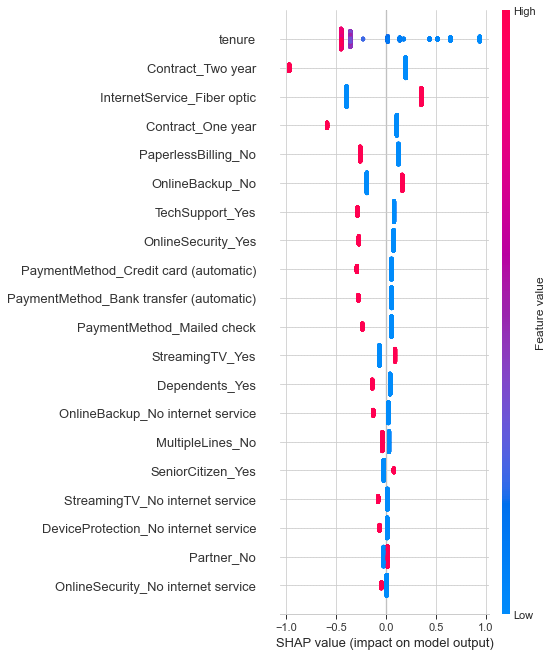

In [90]:
shap.summary_plot(shap_values, df_X_test)

**Comments:**
We get the above plot by putting everything together under one roof. This shows the shap values on the x-axis.
Here, all the values on the left represent the observation that shift the predicted value in the negative direction while the points on the right contribute to shifting the prediction in a positive direction. All the features are on the left y-axis

#### SHAP Dependency Plots
- SHAP dependence plots show the effect of a single (or two) feature across the whole dataset.
- They plot a features value vs. the SHAP value of that feature across many sample.

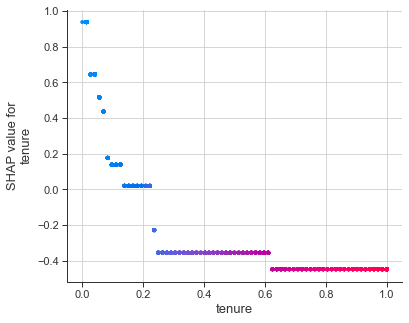

In [91]:
# SHAP dependency plot for Tenure
shap.initjs()
shap.dependence_plot(ind='tenure', interaction_index = 'tenure', 
                     shap_values = shap_values, features= df_X_test)

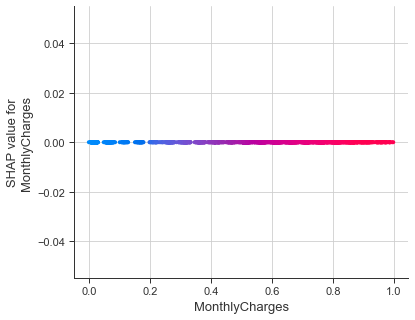

In [92]:
# SHAP dependency plot for MonthlyCharges
shap.initjs()
shap.dependence_plot(ind='MonthlyCharges', interaction_index = 'MonthlyCharges',
                     shap_values = shap_values, features= df_X_test)

In [93]:
requirements = '\n'.join(f'{m.__name__.replace("_","-").replace("sklearn","scikit-learn")}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None))

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print(requirements)

pandas==1.4.2
numpy==1.21.5
seaborn==0.11.2
shap==0.41.0


In [94]:
# Objects tto export
to_export = {
    "pipeline": pipe,
    "df": original_df,
}

In [95]:
# Exportation
with open('ML_items', 'wb') as file:
    pickle.dump(to_export, file)

In [96]:
# Loading after Exportation
with open('ML_items', 'rb') as file:
    loaded_object = pickle.load(file)